# 911 Calls Analysis Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read in the csv file as a dataframe called df 

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Check the info() of the df 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


<h4><b>Dealing with the null value</b></h4>

In [6]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [7]:
df['zip'] = df['zip'].fillna(df.groupby('twp')['zip'].transform('max'))

In [8]:
df.isnull().sum()

lat            0
lng            0
desc           0
zip          169
title          0
timeStamp      0
twp          293
addr           0
e              0
dtype: int64

<h4><b>Now total null values are 462 which we will drop directly</b></h4>

In [9]:
df.shape

(663522, 9)

In [10]:
df = df.dropna()

In [11]:
df.shape

(663229, 9)

In [12]:
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

What are the top 5 zipcodes from which most 911 calls recived? 

In [14]:
df['zip'].value_counts().head()

19464.0    53933
19401.0    45596
19403.0    35035
19446.0    33652
19468.0    22664
Name: zip, dtype: int64

What are the top 5 townships (twp) from which most 911 calls recived? 

In [15]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

How many unique title codes are there? 

In [16]:
df['title'].nunique()

148

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We will create a new column called "Reason" that contains this string value. 

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [17]:
reson=[]
def reasons(x):
    reson.append(x.split(':')[0])
df['title'].apply(reasons)
df['reason'] = reson

In [18]:
Sub_reason=[]
def sub_reasons(x):
    sub_reason = x.split(':')[1]
    Sub_reason.append(sub_reason.replace(' -',''))
df['title'].apply(sub_reasons)
df['sub_reasons'] = Sub_reason

What is the most common Reason for a 911 call based off of this new column? 

In [19]:
df['reason'].value_counts()

EMS        332480
Traffic    230204
Fire       100545
Name: reason, dtype: int64

create a countplot of 911 calls by Reason.

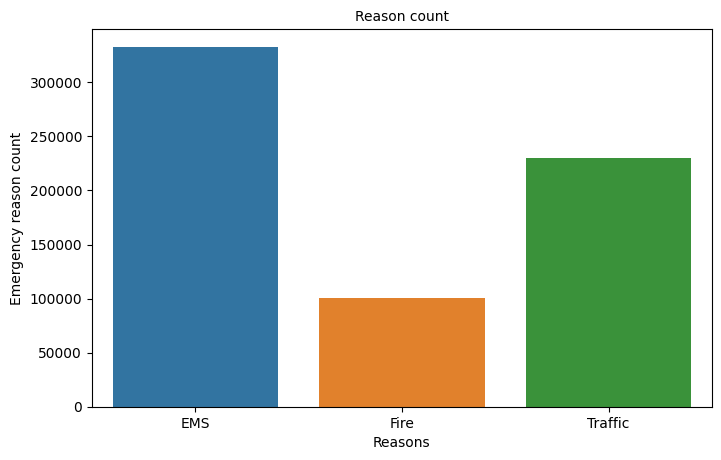

In [20]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x ='reason',data= df)
plt.title('Reason count',fontsize=10)
plt.ylabel('Emergency reason count',fontsize=10)
plt.xlabel('Reasons',fontsize=10);

In [21]:
type(df['timeStamp'].iloc[0])

str

**We will create 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column.**
**We will map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [23]:
days=[]
hours =[]
months =[]
dayofweek =[]
def hdmcol(x):
    days.append(x.day)
    hours.append(x.hour)
    months.append(x.month)
    dayofweek.append(x.dayofweek)
pd.to_datetime(df['timeStamp'])
df['timeStamp'].apply(hdmcol)
df['day'] = days
df['hour'] = hours
df['month'] = months
df['dayofweek'] = dayofweek
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['dayofweek'].map(dmap)
df.drop('dayofweek', inplace = True,axis =1)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,sub_reasons,day,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,10,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,10,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,10,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,10,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,10,16,12,Thu


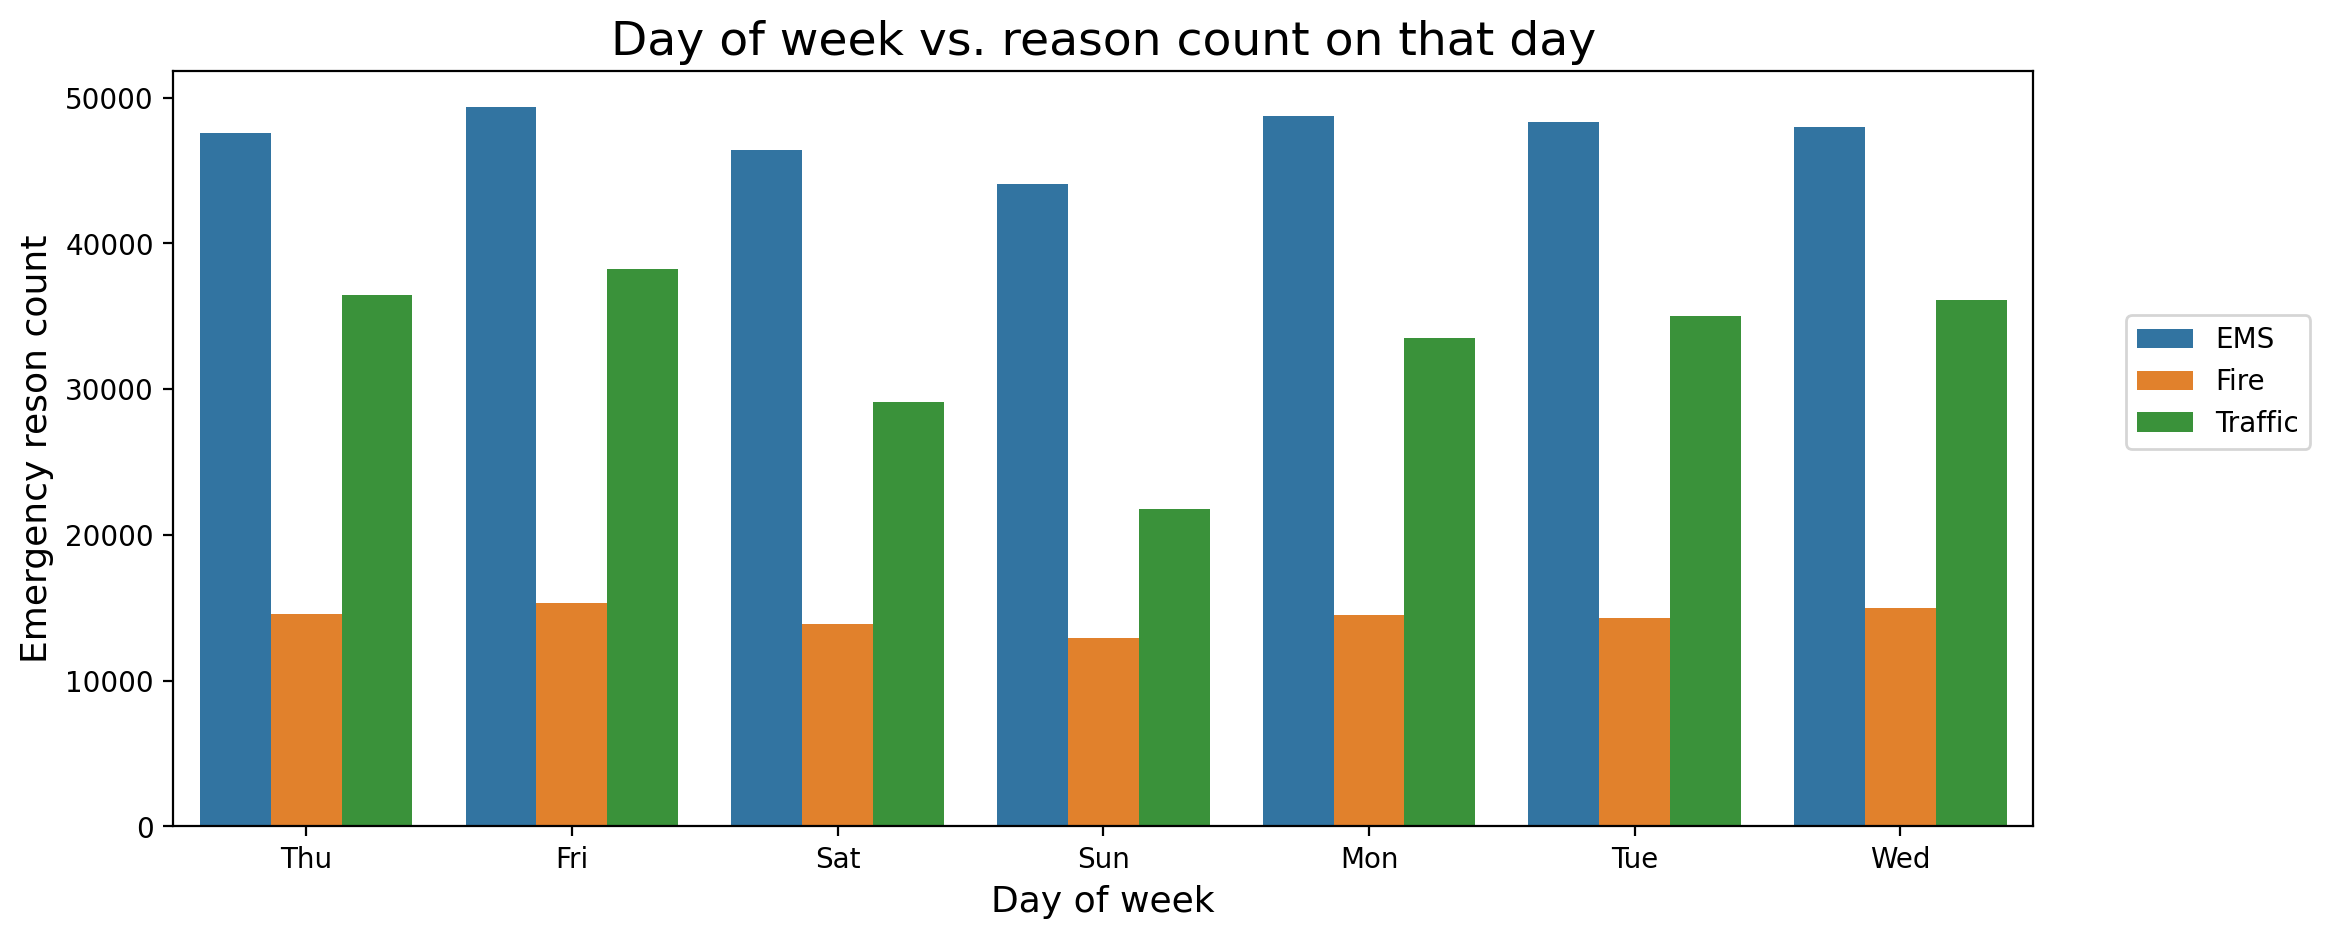

In [24]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='day_of_week',data = df, hue = 'reason')
plt.title('Day of week vs. reason count on that day',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Day of week',fontsize=13);

<h5><b>EMS emergency is high throughout the week while fire emergency is lower and quiet similiar for all days</b></h5> 

**Now do the same for Month:**

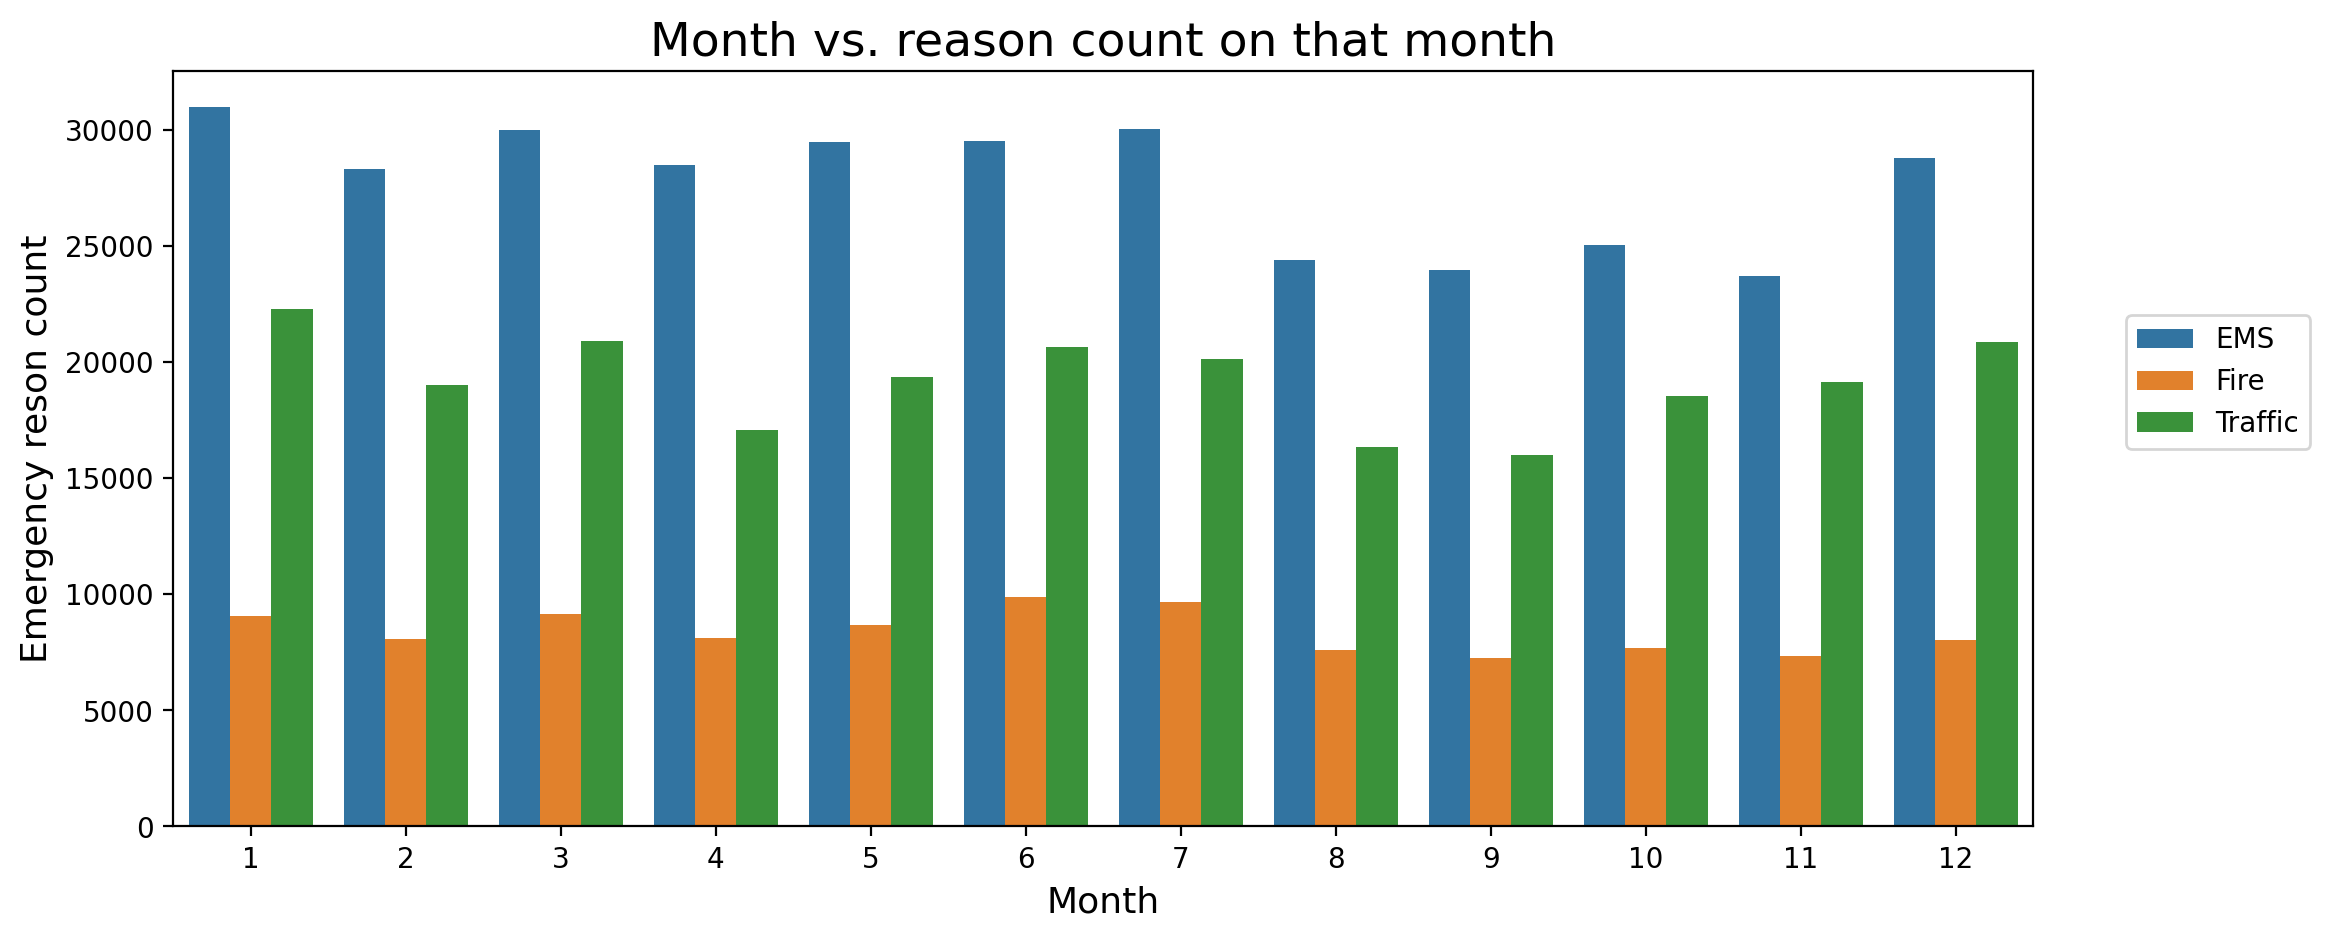

In [25]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='month',data=df,hue='reason')
plt.title('Month vs. reason count on that month',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Month',fontsize=13);

<h4><b>what are the emergency reason count in day and night?</b></h4>
<ul>
    <li>For day hour = 7 - 19</li>
    <li>For night hour = 00-6 and 18-00</li>
</ul>

In [26]:
def day_night(x):
    if x in range(7,20):
        return 'Day hour'
    elif x in range(0,7):
        return 'Night hour'
    else:
        return 'Night hour'

In [27]:
df['day_night']=df['hour'].apply(day_night)

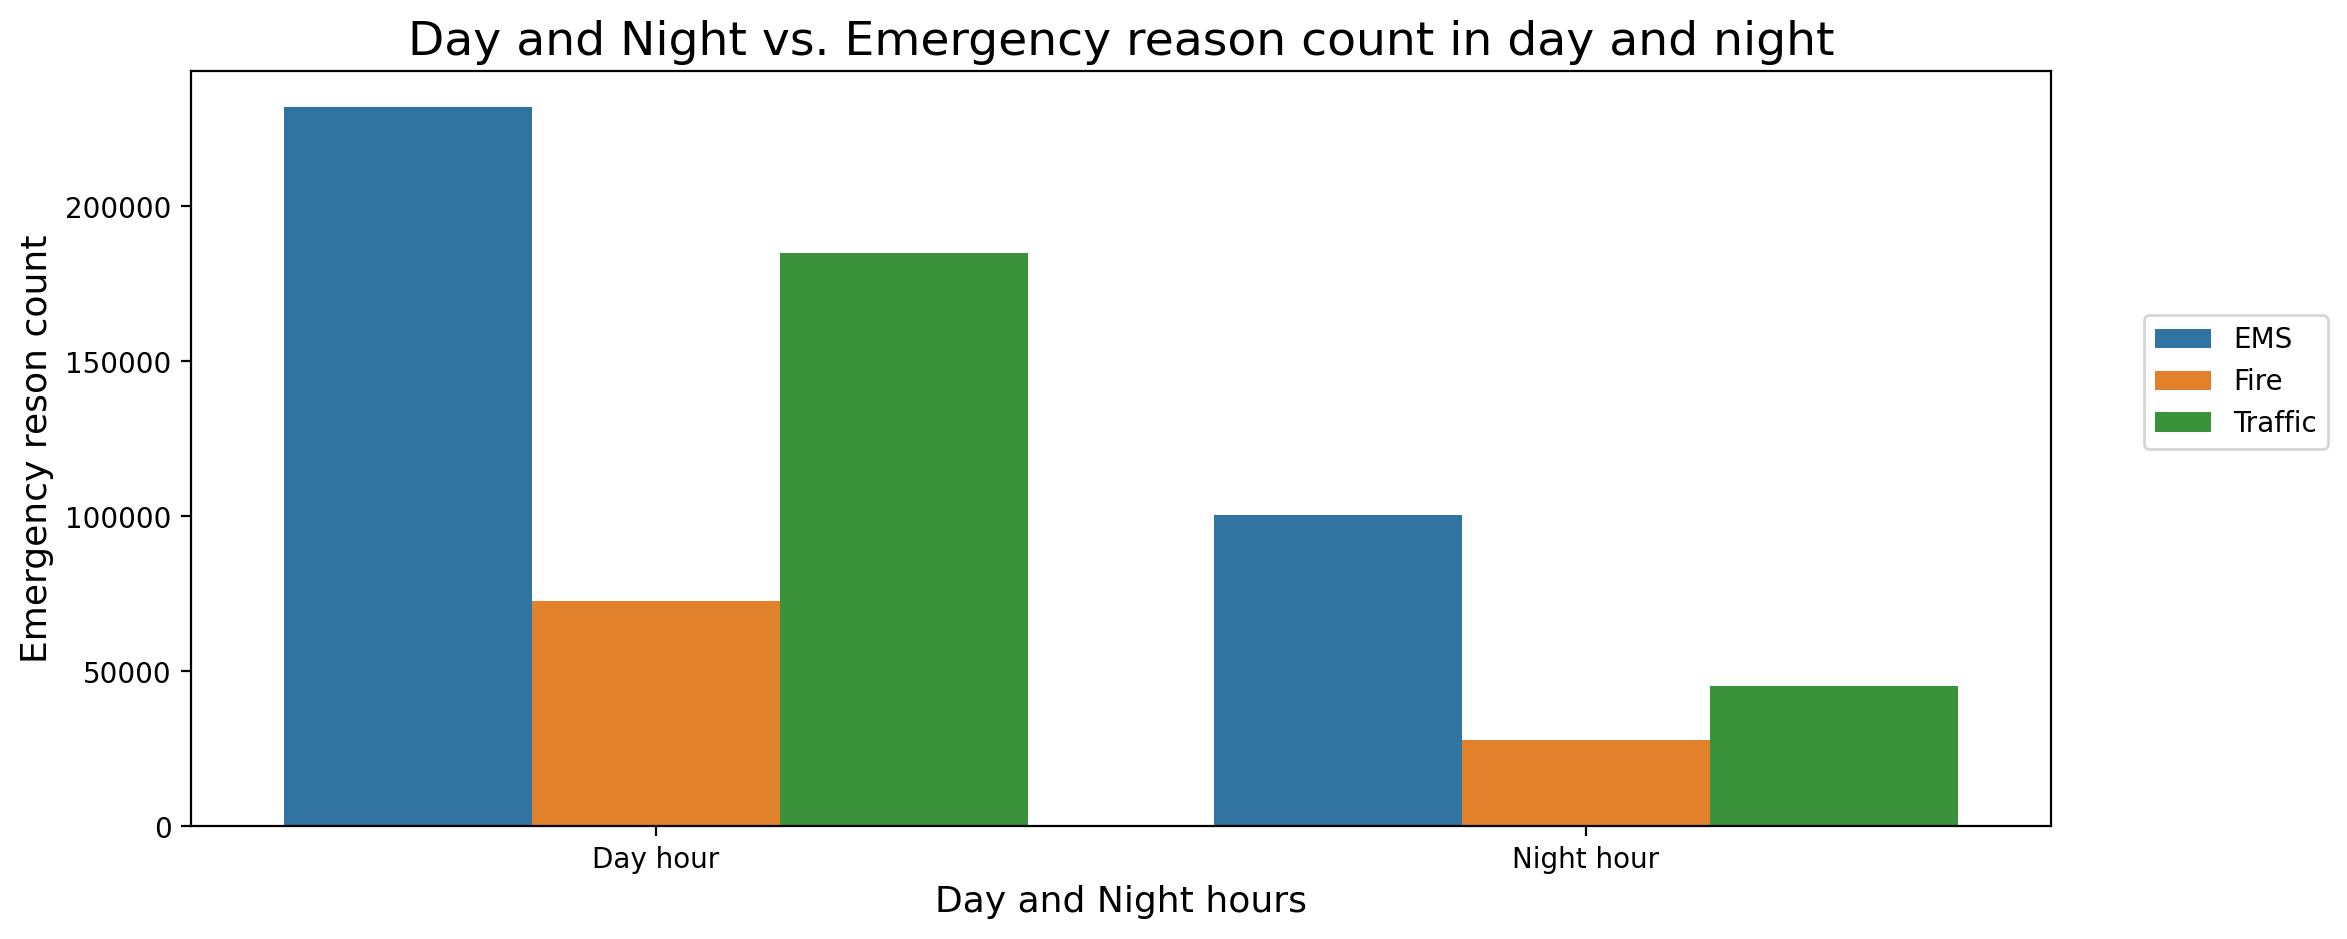

In [28]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='day_night',data=df,hue='reason')
plt.title('Day and Night vs. Emergency reason count in day and night',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Day and Night hours',fontsize=13);

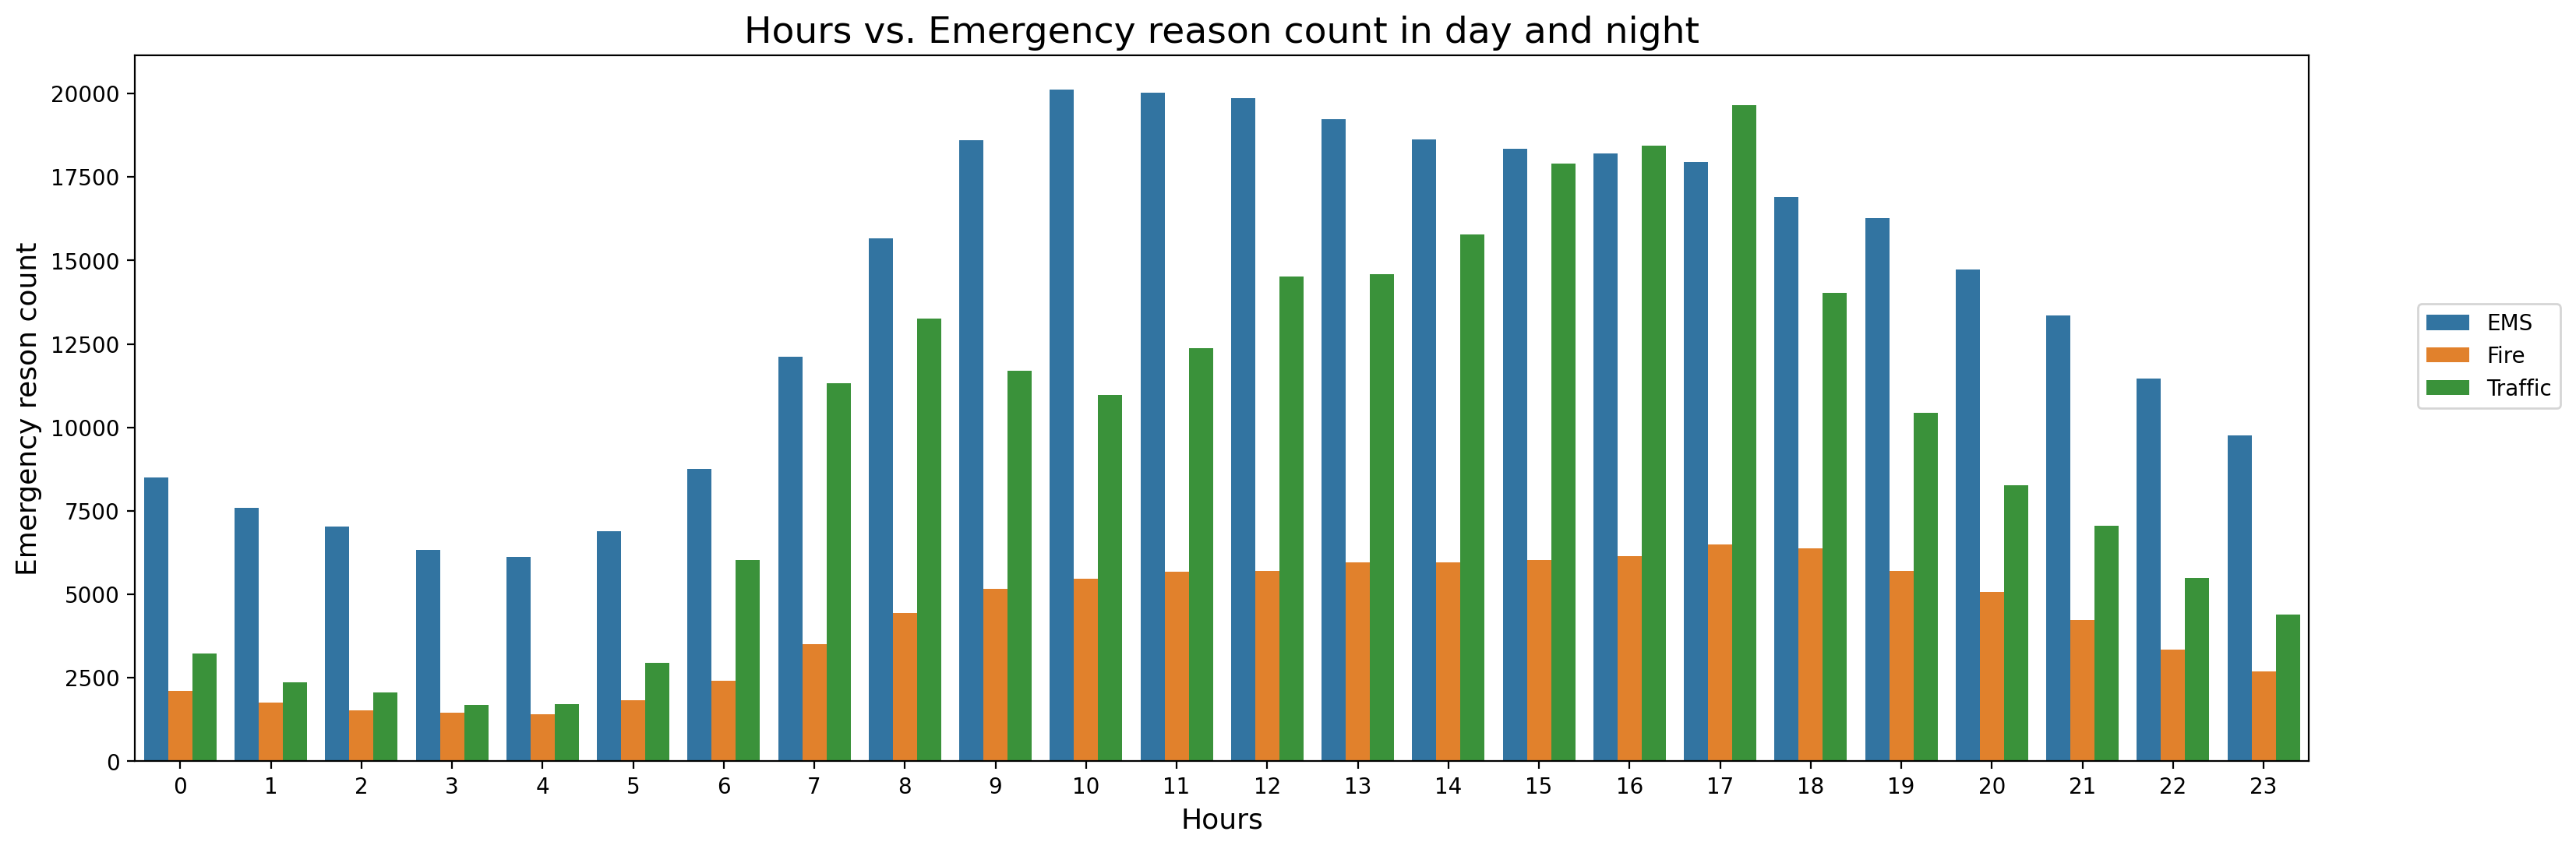

In [29]:
plt.figure(figsize=(18,6),dpi=200)
sns.countplot(x='hour',data=df,hue='reason')
plt.title('Hours vs. Emergency reason count in day and night',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Hours',fontsize=13);

<ul>
<li><h5><b>Emergency calls in day time is large due to the high crowd in the prime time</b></h5></li>
<li><h5><b>Prime time is between 8:00 to 18:00 where most of the emergency calls occurs</b></h5></li>
<li><h5><b>Prime time for the traffic emergency is between the 11:00 to 17:00 due to the office crowd</b></h5></li>

<h3> Observations for Emergency reasons and their respective sub reasons with township</h3>

<h4><b>Township with most Fire emergency</b></h4>

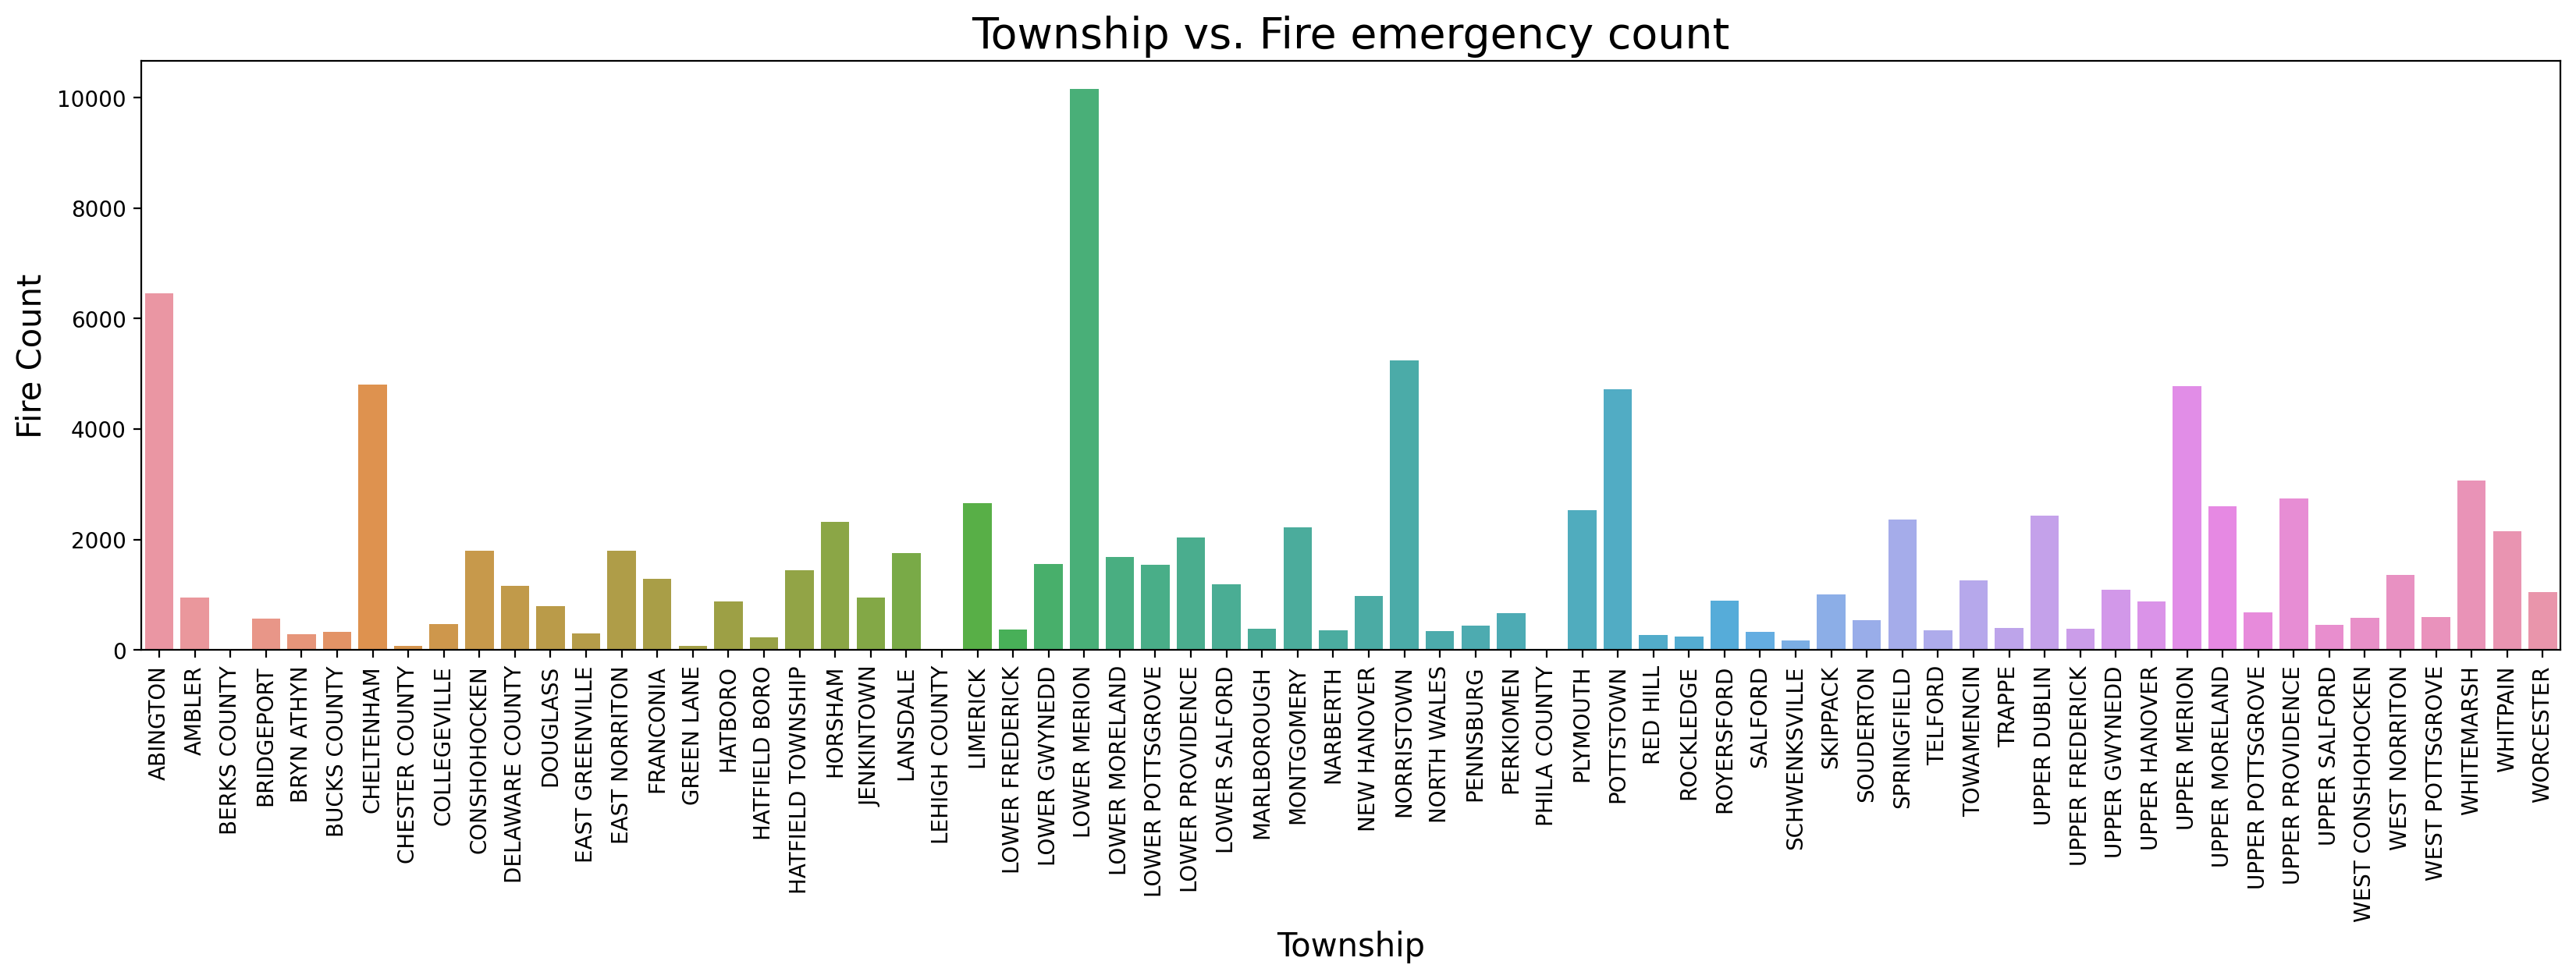

In [30]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=df[df['reason']=='Fire'].sort_values(by='twp'))
plt.title('Township vs. Fire emergency count',fontsize=20)
plt.ylabel('Fire Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

<h3><b> Sub reasons due to which fire emergency occurs</b></h3>

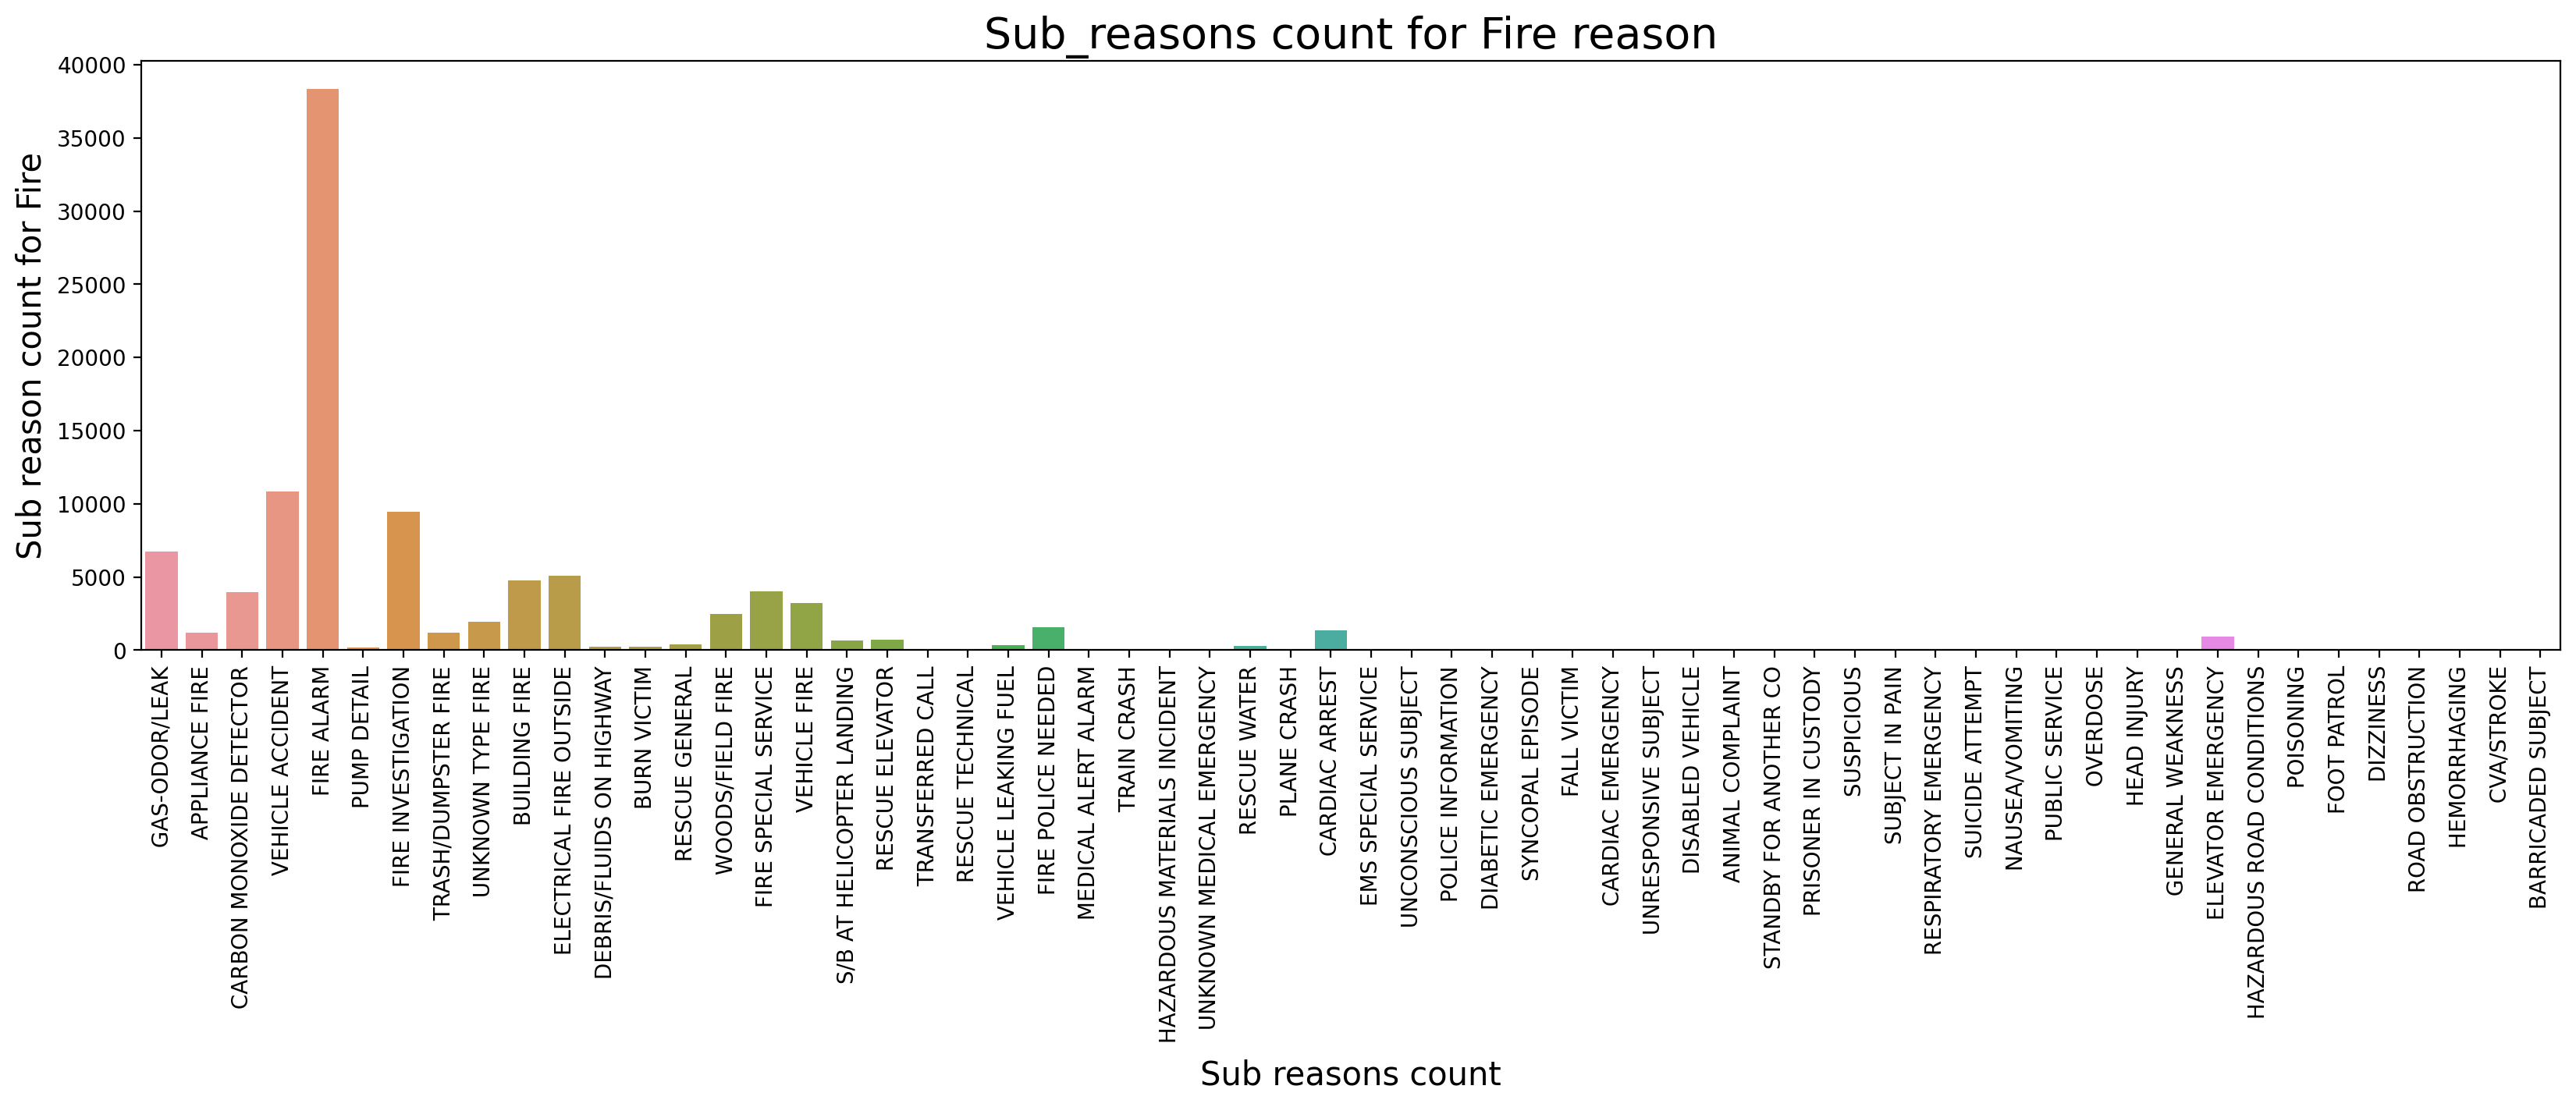

In [31]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='sub_reasons',data=df[df['reason']=='Fire'])
plt.title('Sub_reasons count for Fire reason',fontsize=20)
plt.ylabel('Sub reason count for Fire',fontsize=15)
plt.xlabel('Sub reasons count',fontsize=15)
plt.xticks(rotation=90);

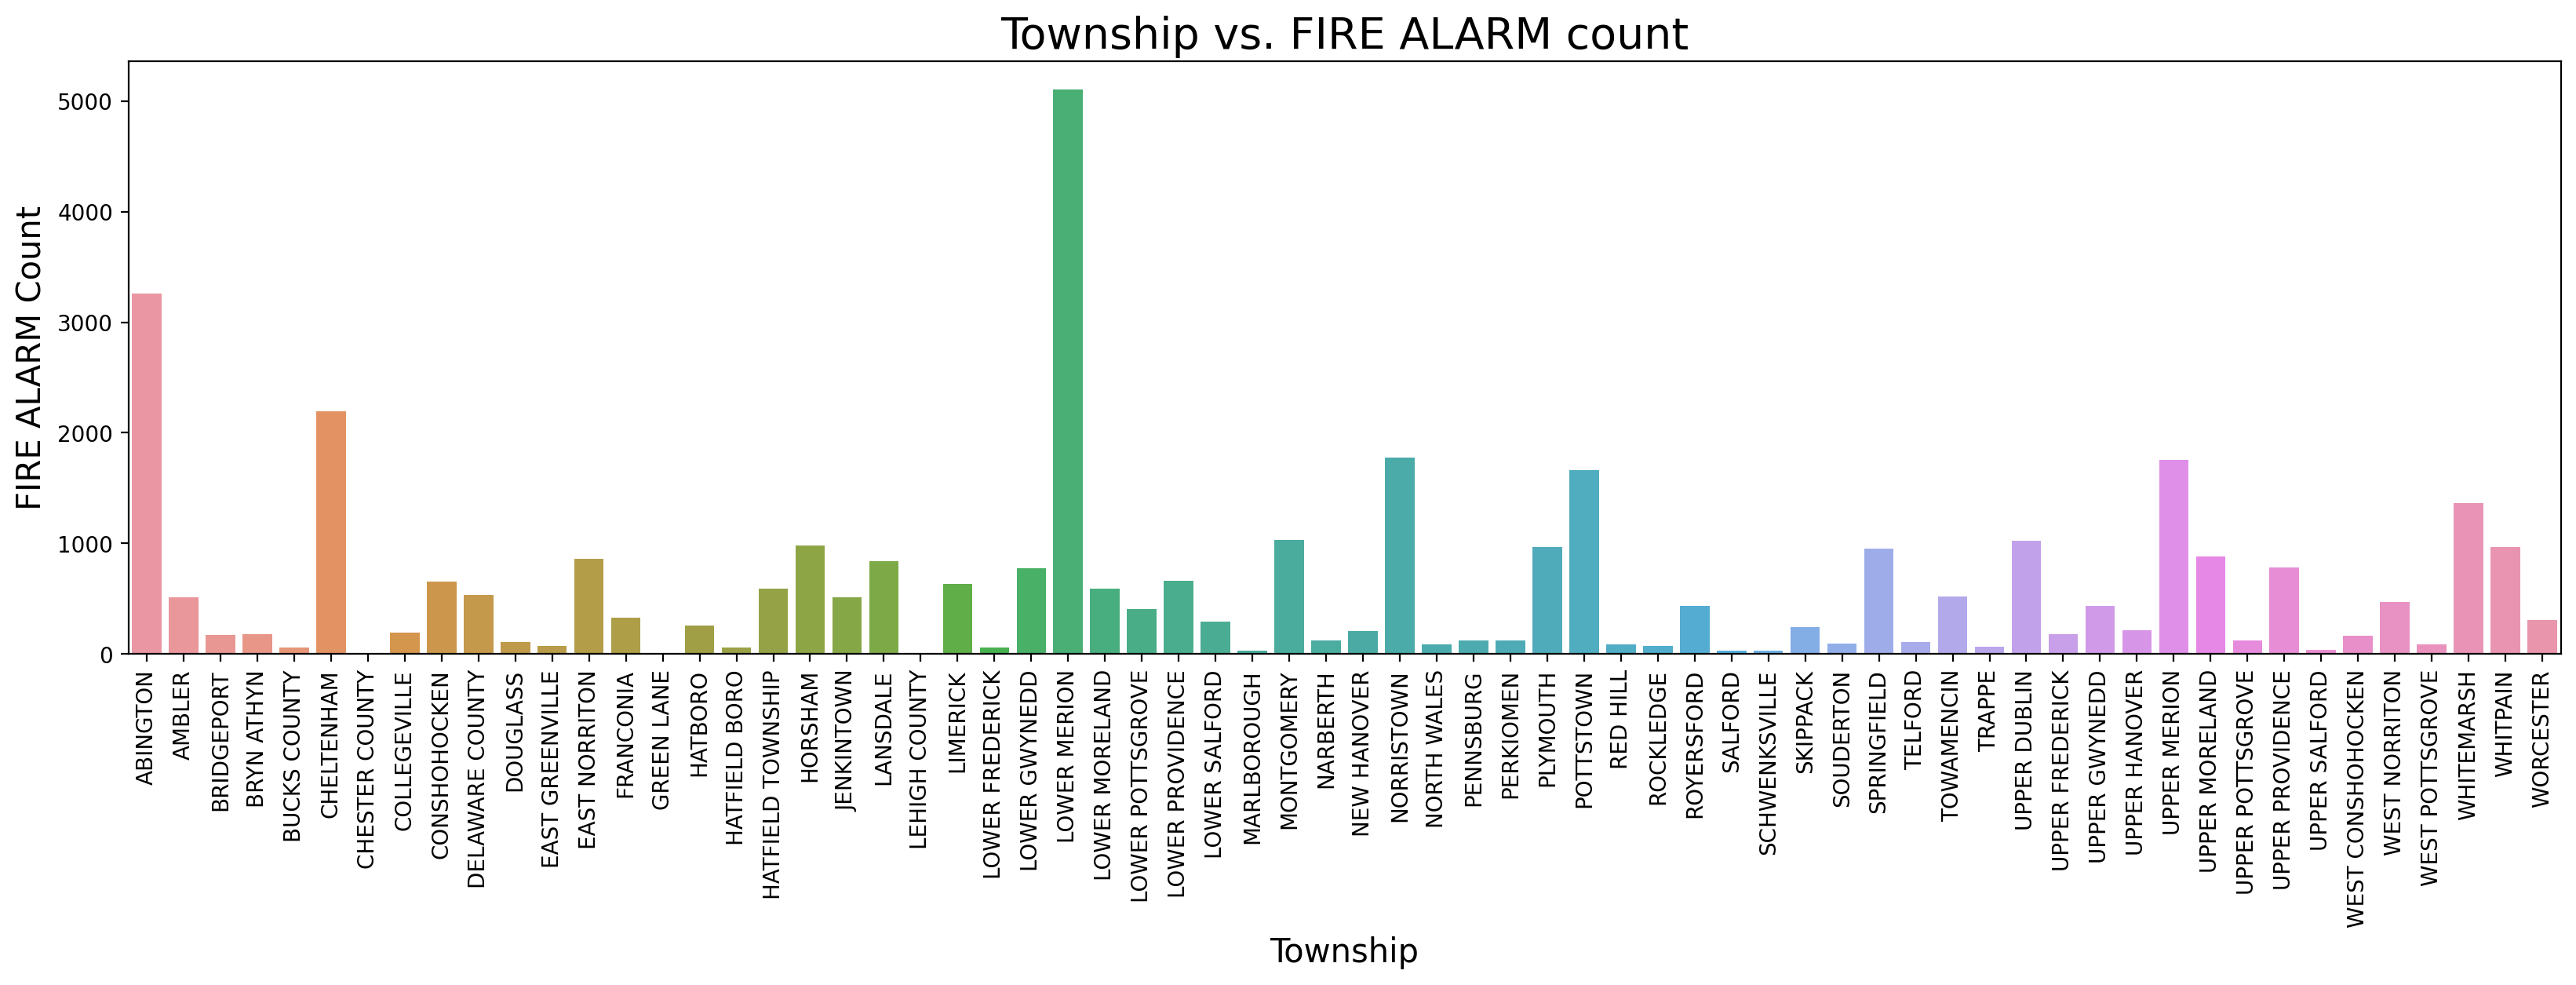

In [32]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=df[df['sub_reasons']==' FIRE ALARM'].sort_values(by='twp'))
plt.title('Township vs. FIRE ALARM count',fontsize=20)
plt.ylabel('FIRE ALARM Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

<li><h5><b>Lower merion</b> has most Fire emergencies</h5></li>
<li><h5><b>Fire alarm</b> is the sub reason due to which most of the fire emergency occurs</h5></li>
<li><h5><b>Lower Merion and Abington</b> are the township for the most fire alarm</h5></li>

<h4><b>Township with most EMS emergency</b></h4>

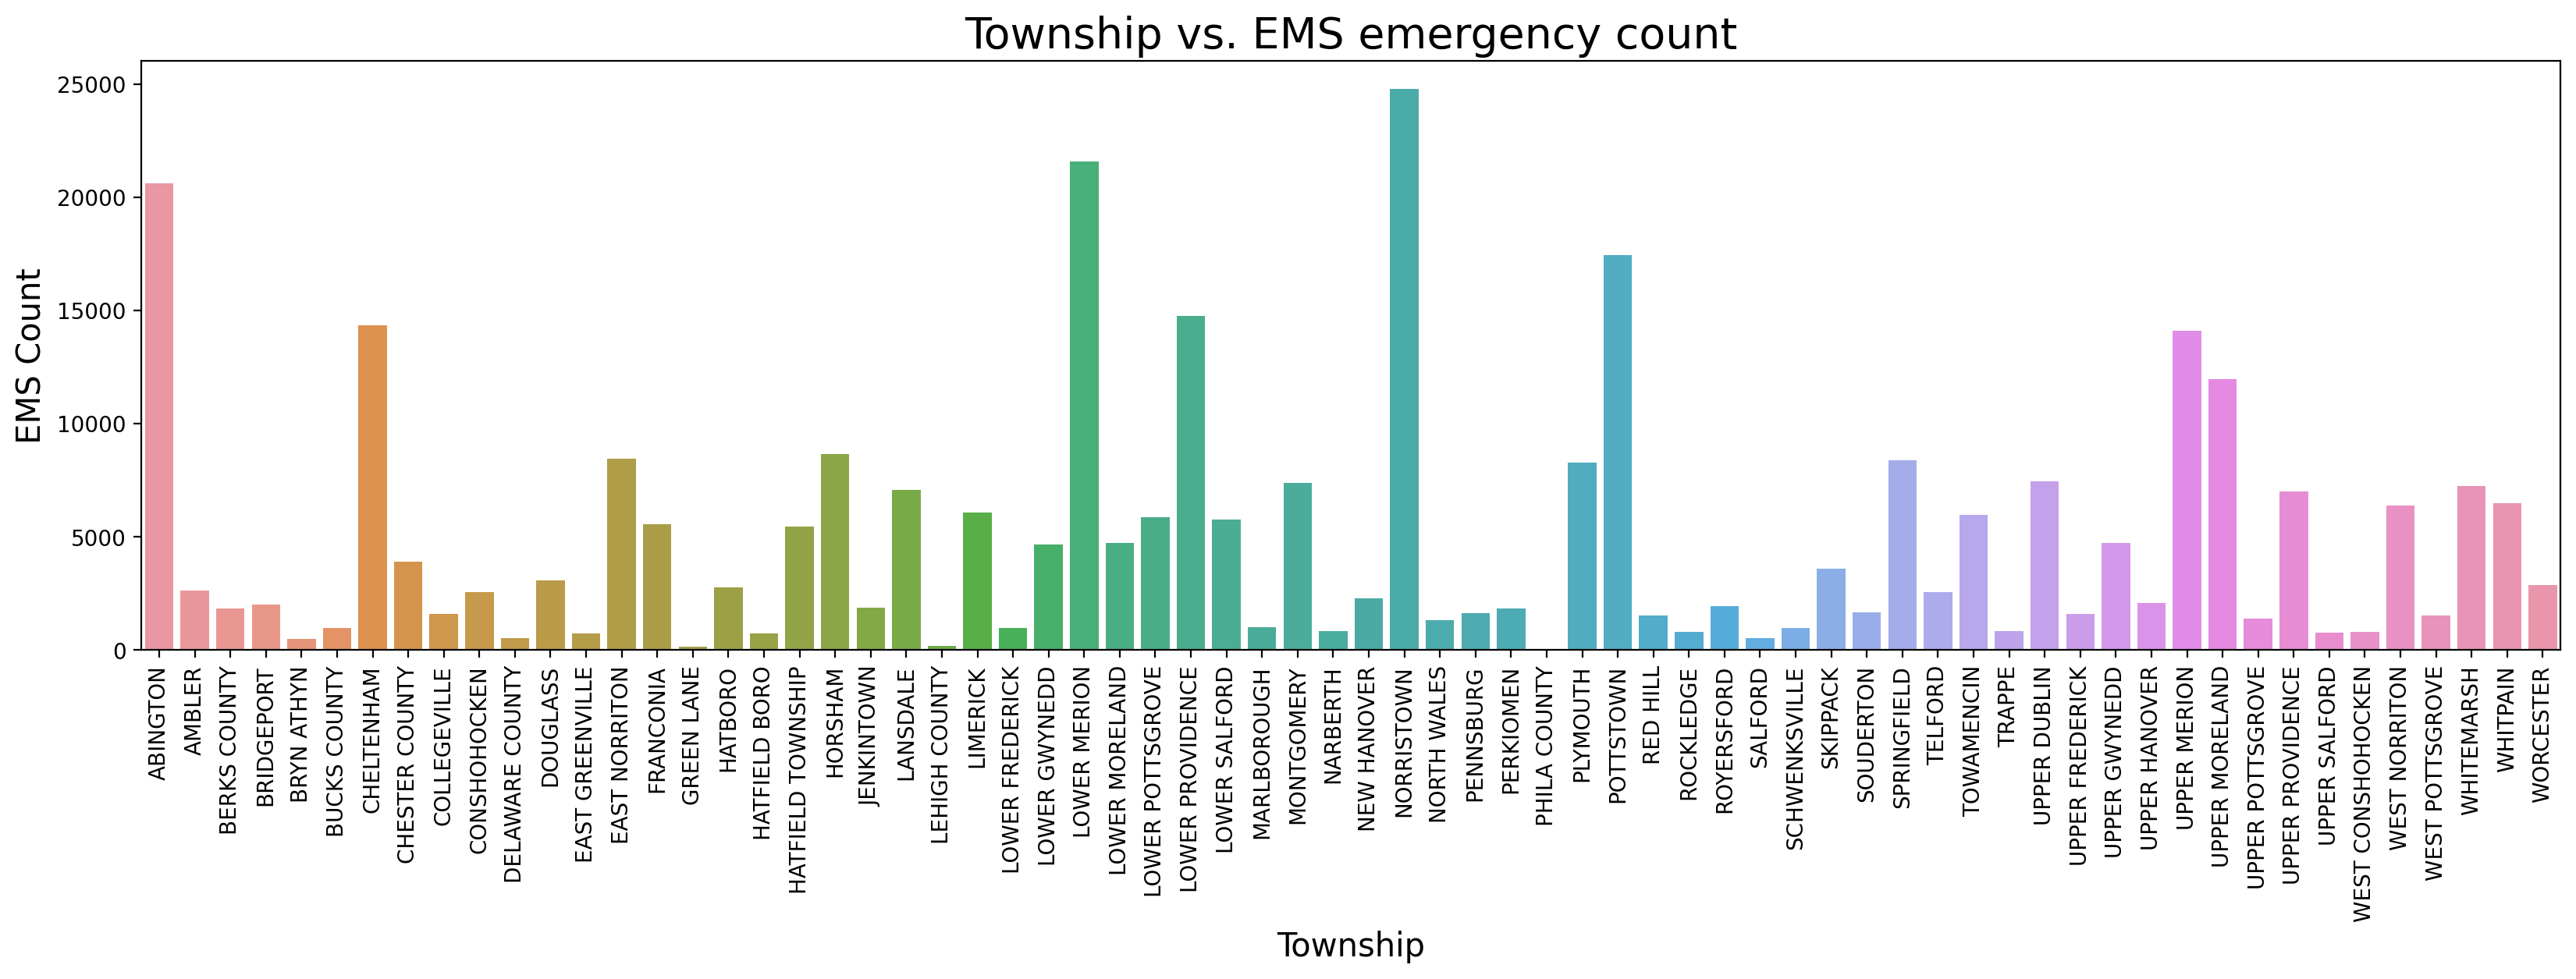

In [33]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=df[df['reason']=='EMS'].sort_values(by='twp'))
plt.title('Township vs. EMS emergency count',fontsize=20)
plt.ylabel('EMS Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

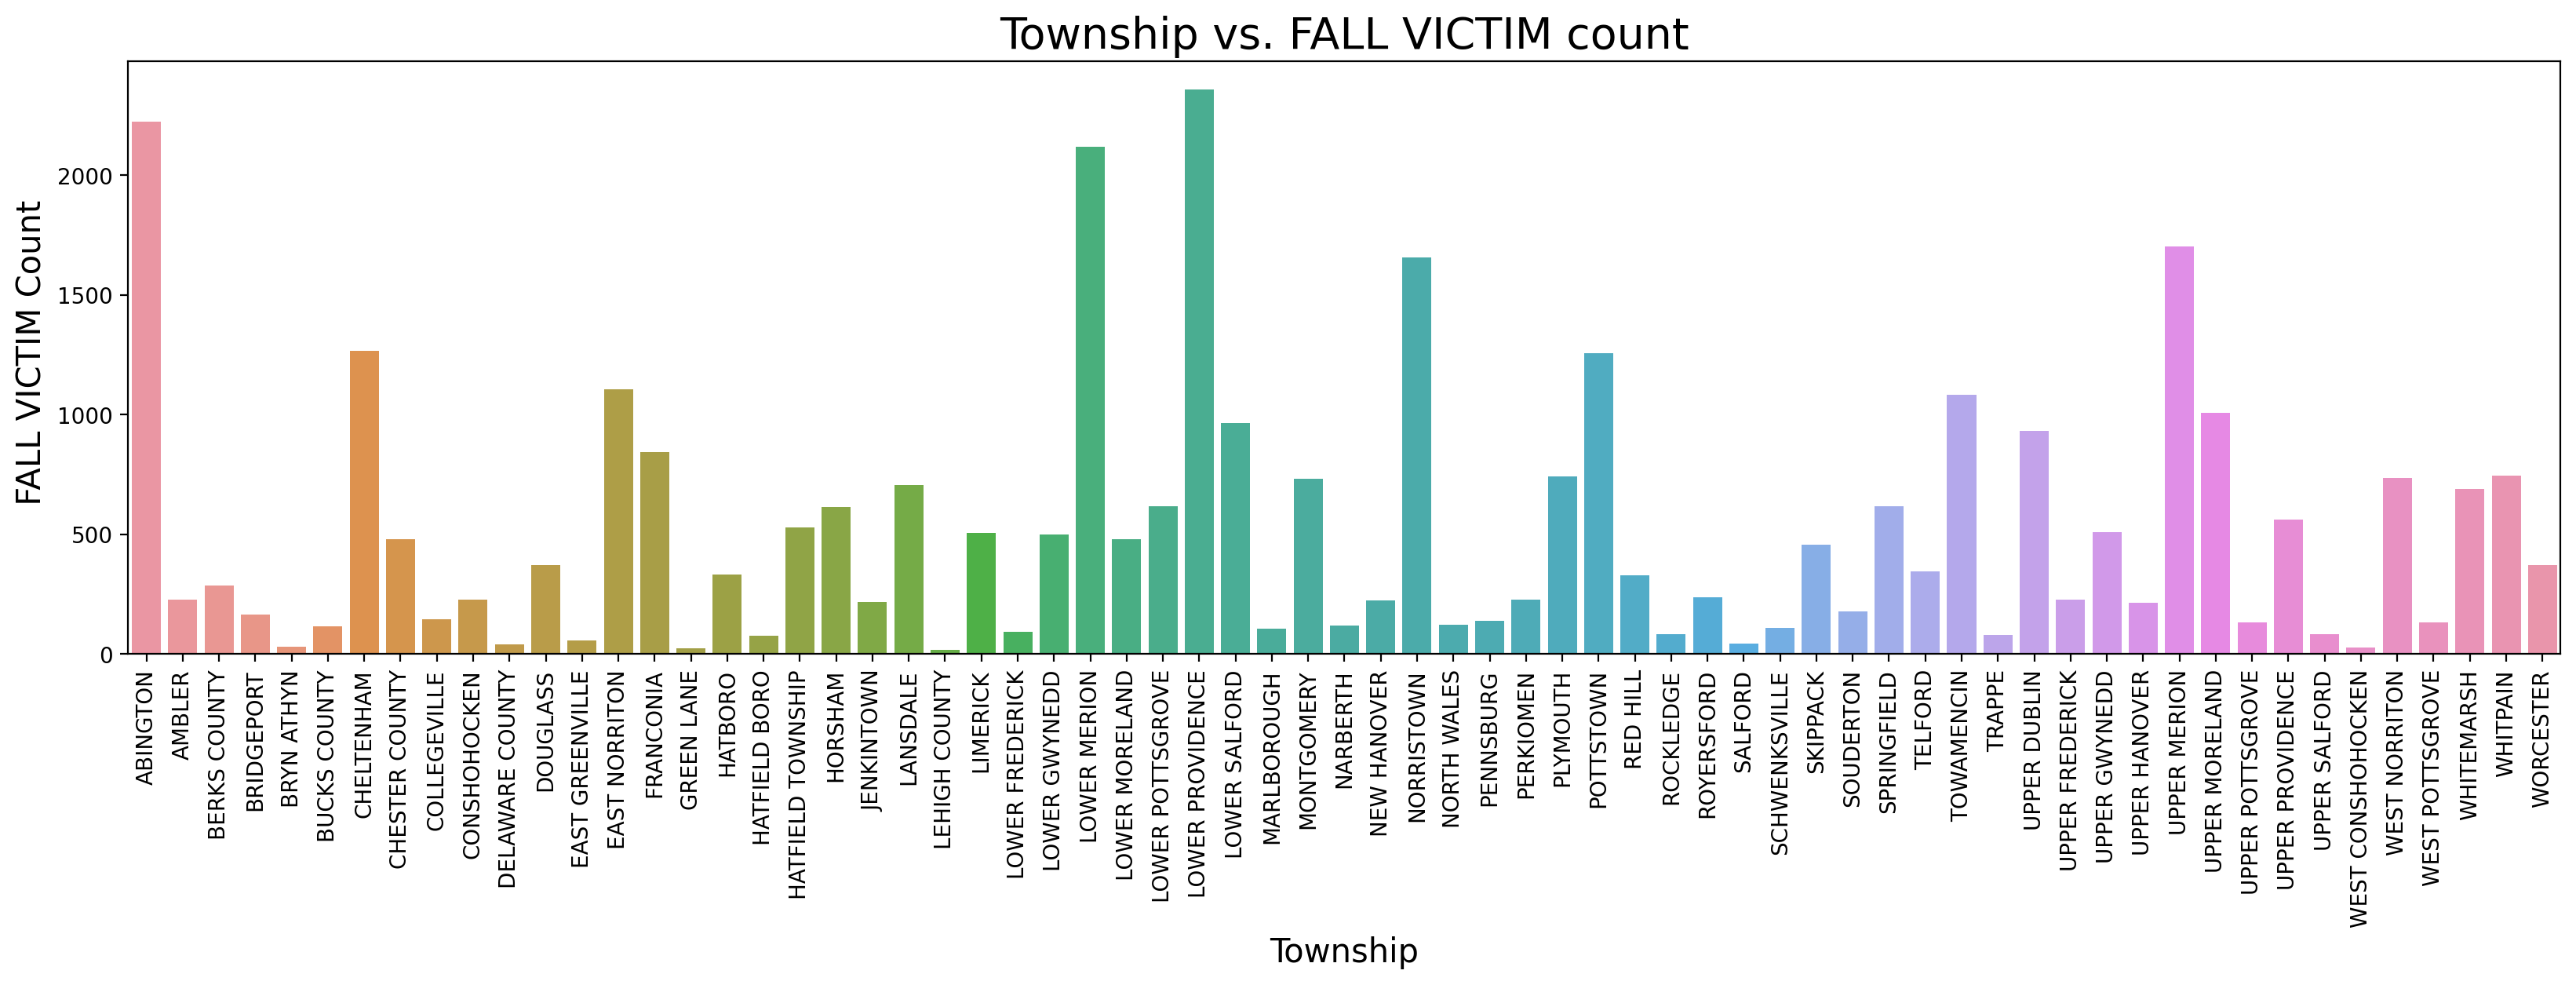

In [34]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=df[(df['sub_reasons']==' FALL VICTIM')].sort_values(by='twp'))
plt.title('Township vs. FALL VICTIM count',fontsize=20)
plt.ylabel(' FALL VICTIM Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

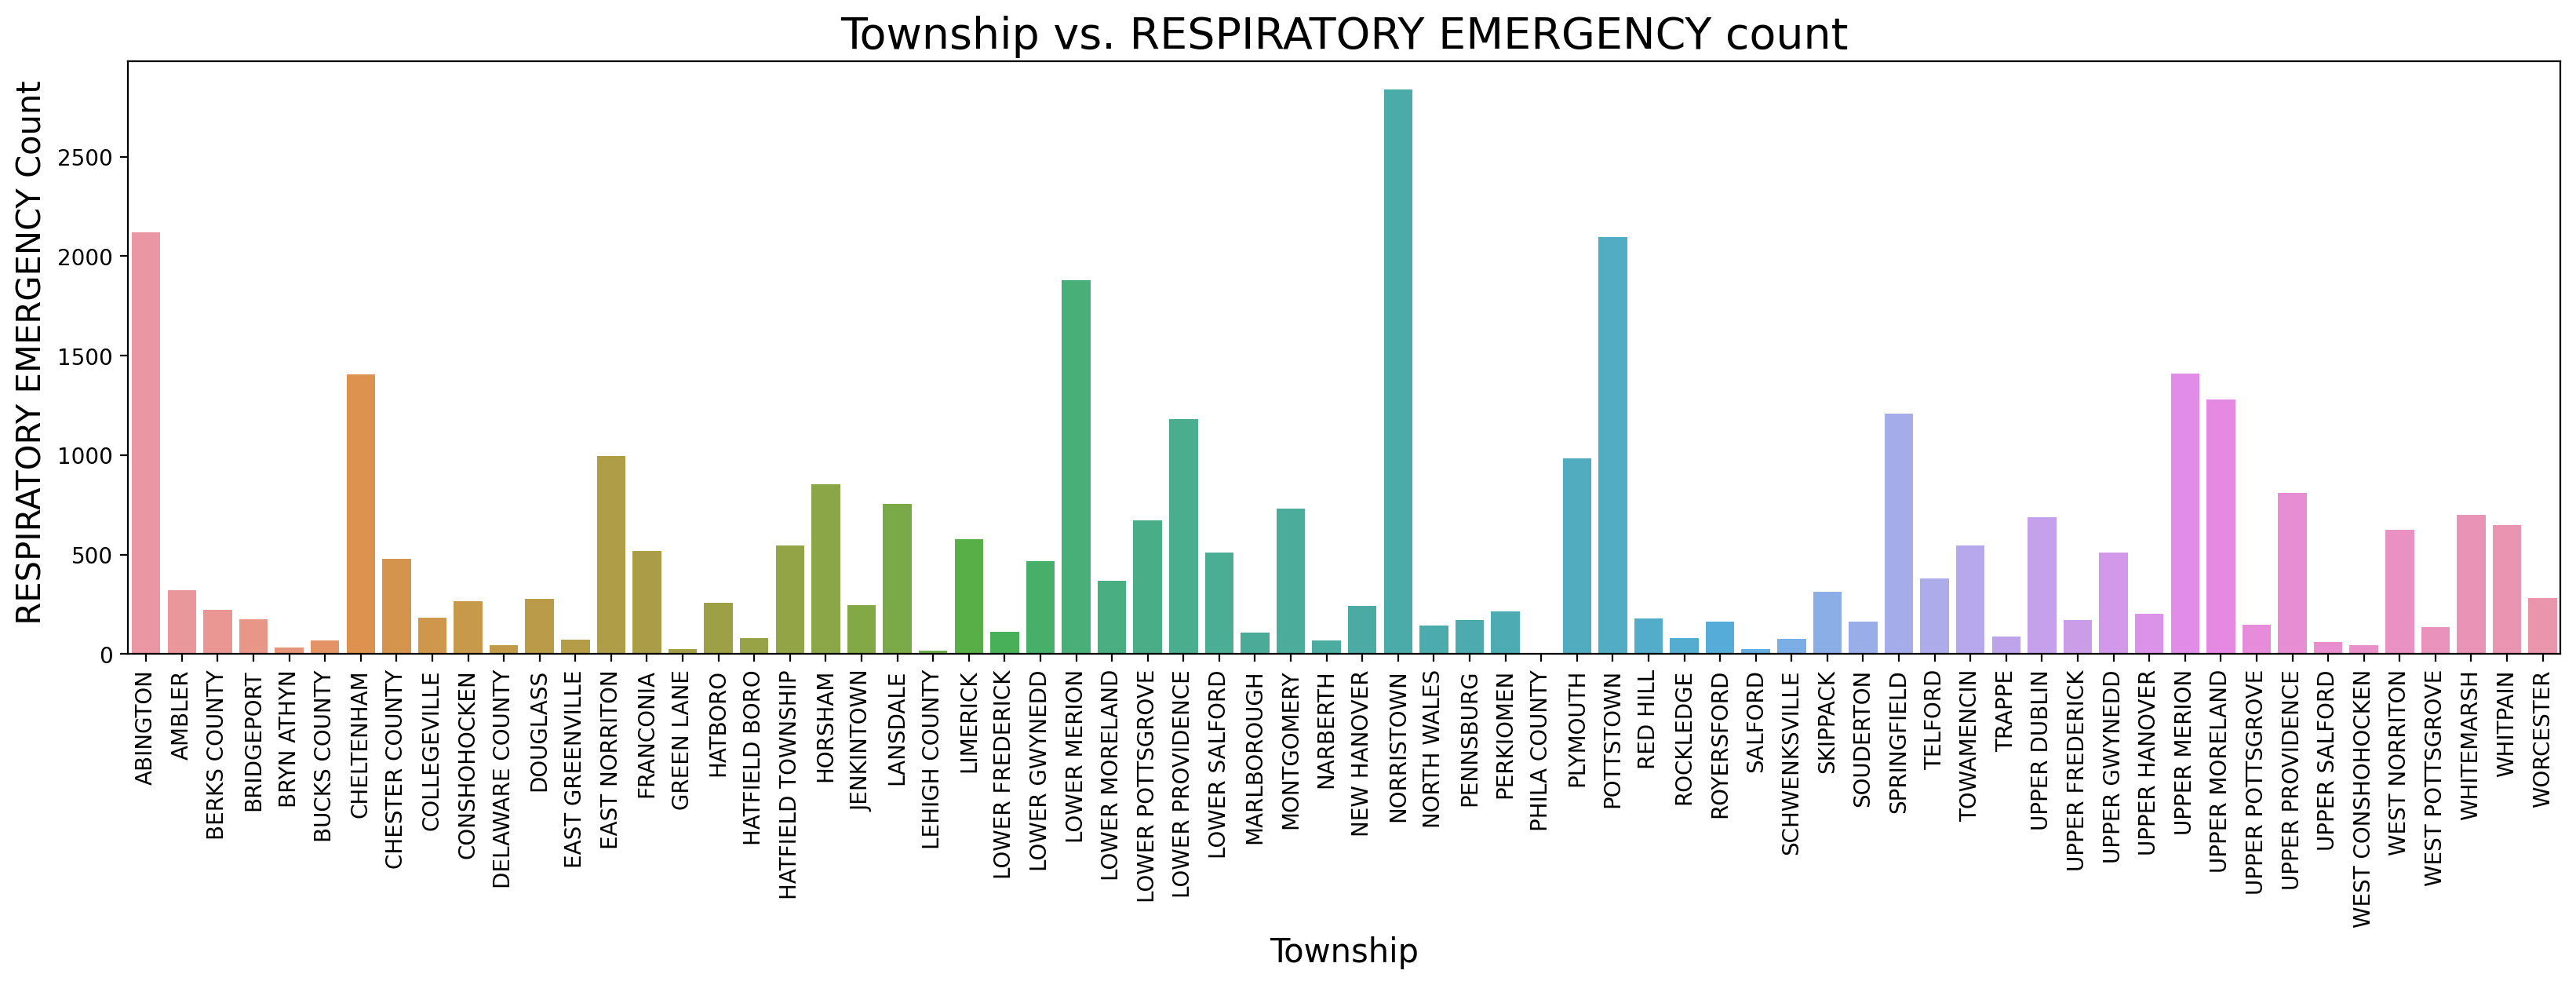

In [35]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=df[(df['sub_reasons']==' RESPIRATORY EMERGENCY')].sort_values(by='twp'))
plt.title('Township vs. RESPIRATORY EMERGENCY count',fontsize=20)
plt.ylabel(' RESPIRATORY EMERGENCY Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

<li><h5><b>Norristown</b> has most EMS emergencies</h5></li>
<li><h5><b>Fall victim and Respiratory</b> are the sub reason due to which most of the EMS emergency occurs</h5></li>
<li><h5><b>Lower Providence,Abington and Lower Merion</b> are the township for the most fall victims</h5></li>
<li><h5><b>Norristown and Lower Merion</b> are the township for the most Respiratory emergency implies that air pollution is higher than other cities</h5></li>

<h4><b>Township with most Traffic emergency</b></h4>

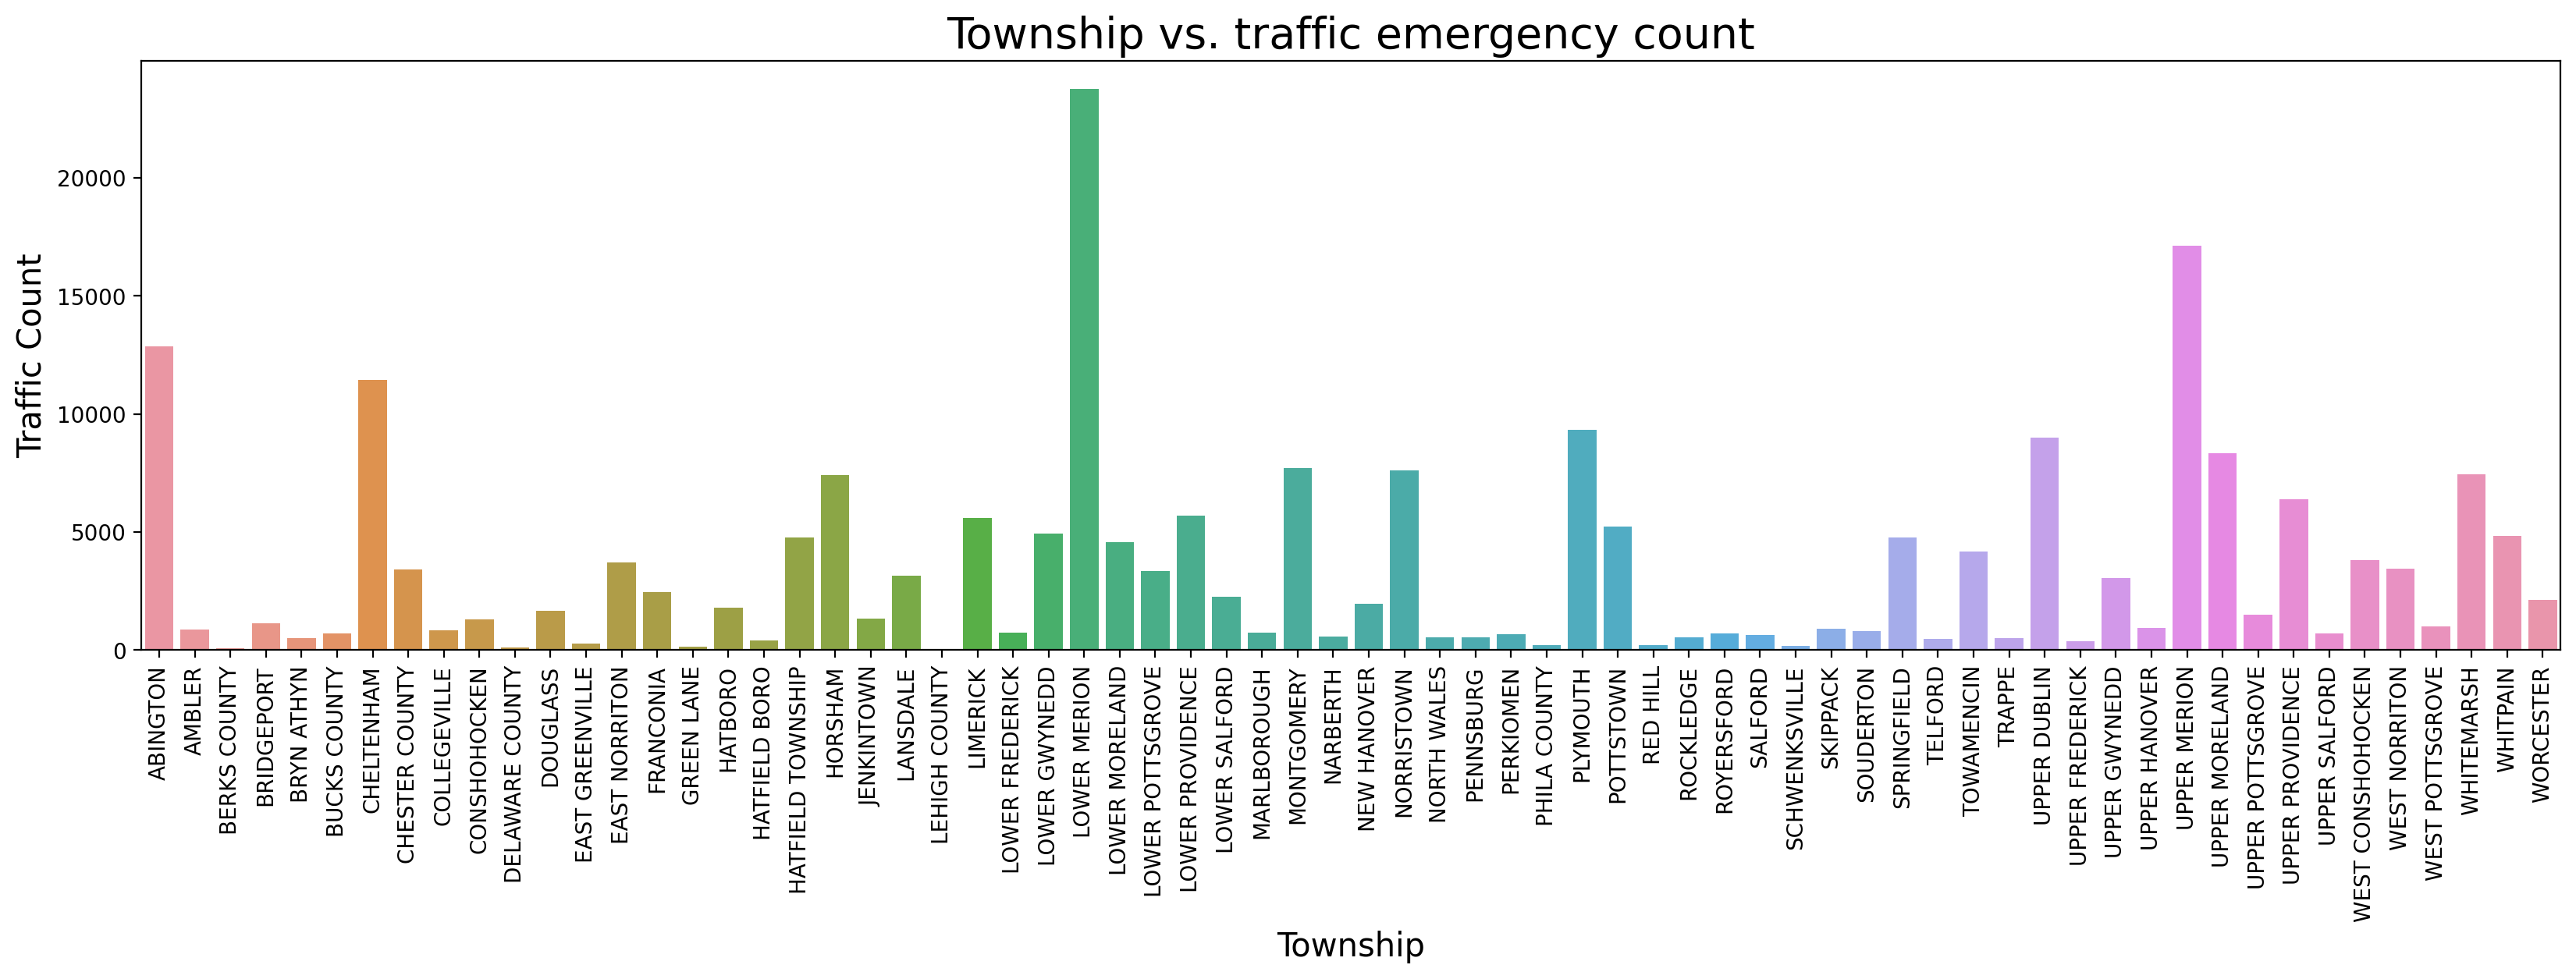

In [36]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=df[df['reason']=='Traffic'].sort_values(by='twp'))
plt.title('Township vs. traffic emergency count',fontsize=20)
plt.ylabel('Traffic Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

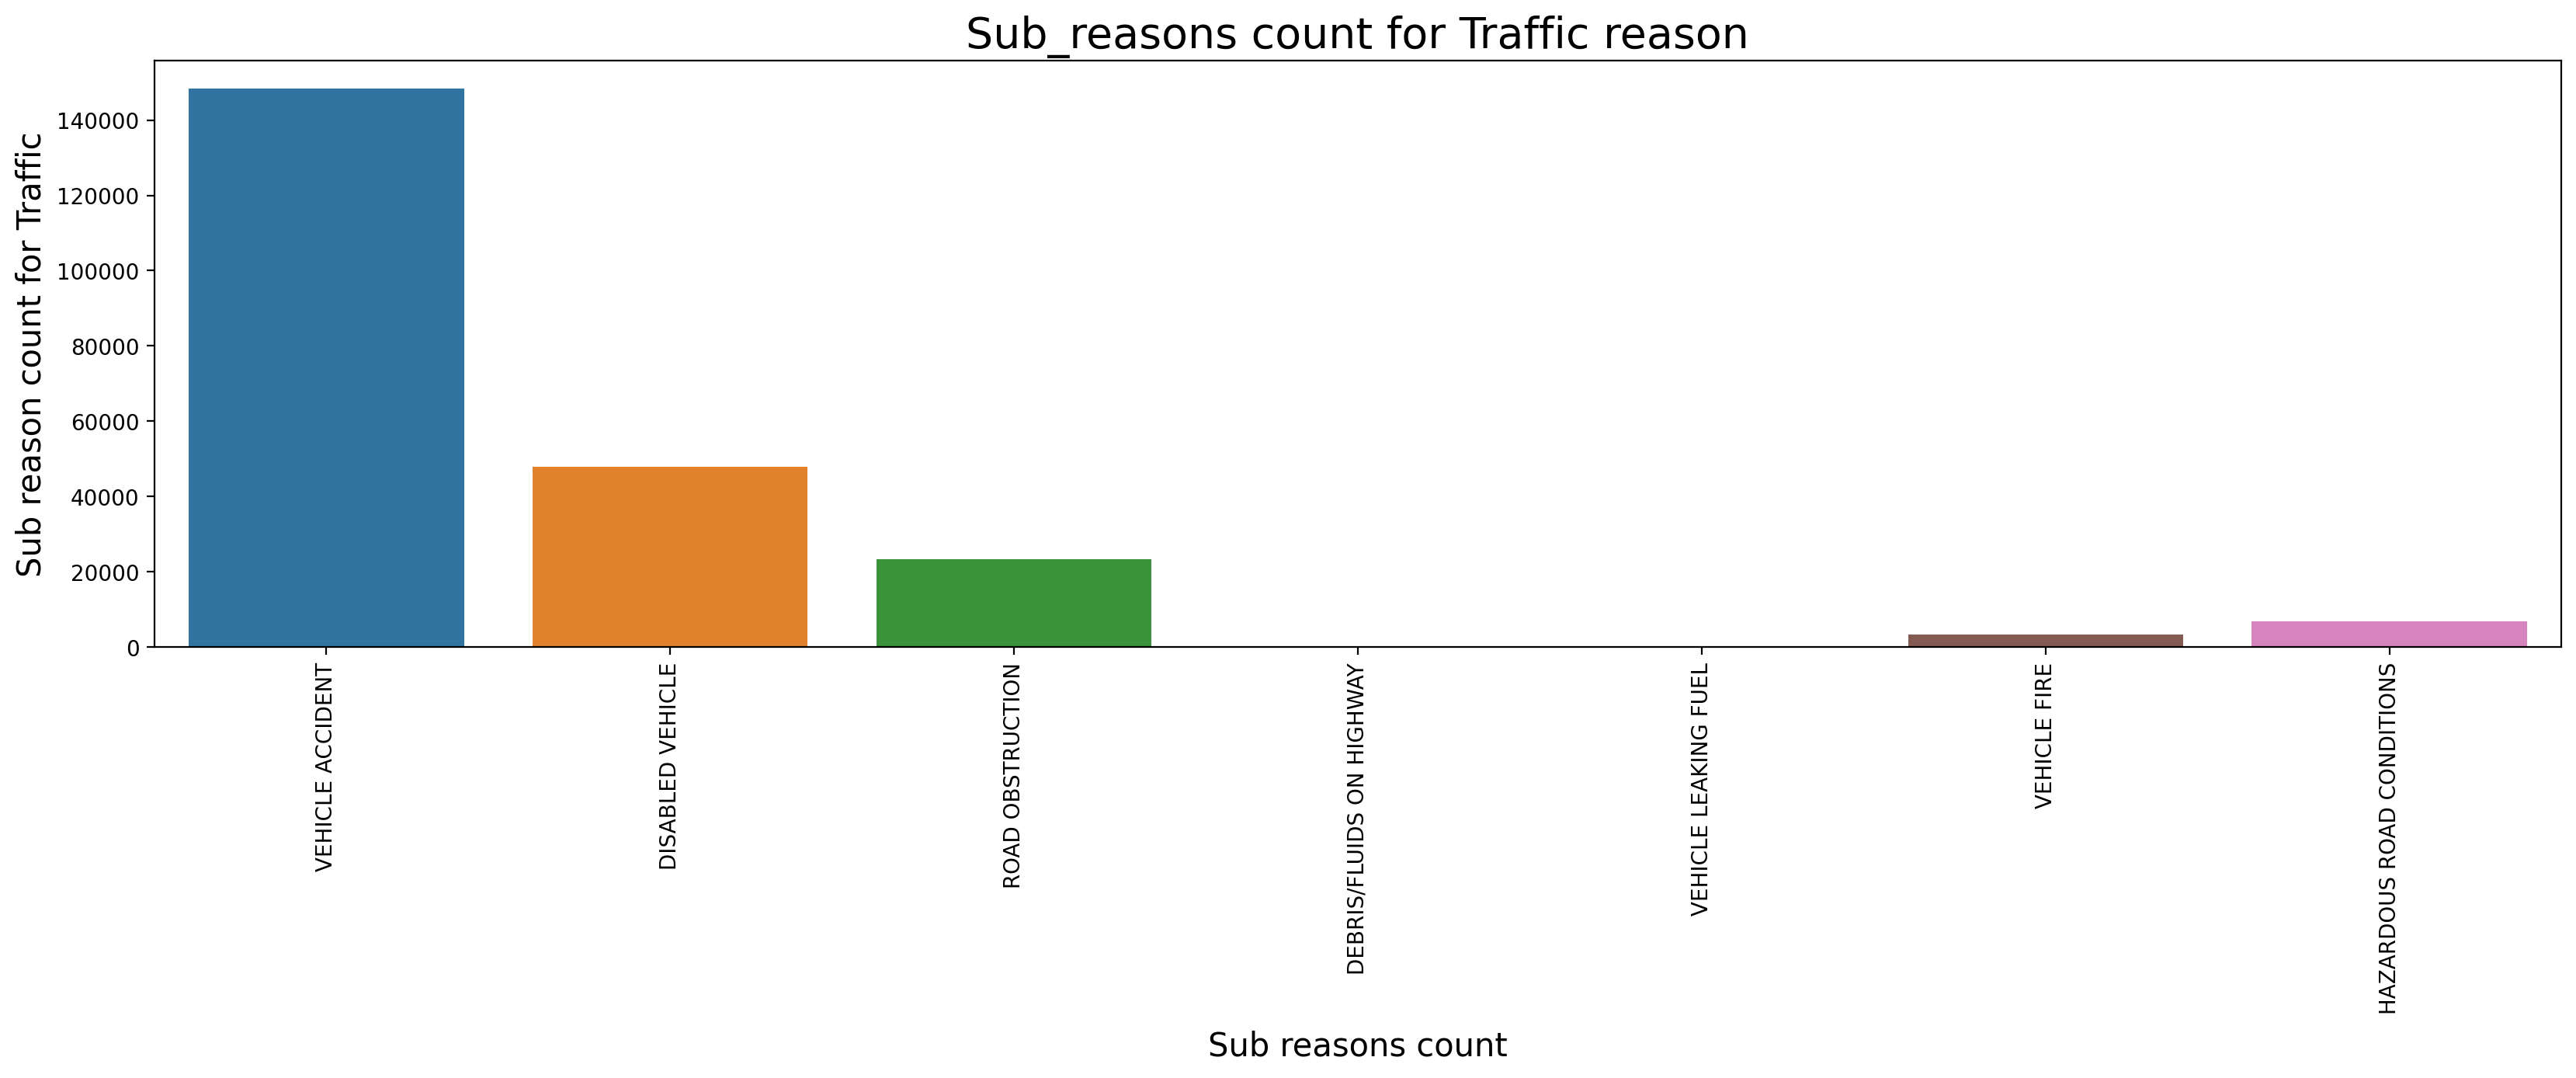

In [37]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='sub_reasons',data=df[df['reason']=='Traffic'])
plt.title('Sub_reasons count for Traffic reason',fontsize=20)
plt.ylabel('Sub reason count for Traffic',fontsize=15)
plt.xlabel('Sub reasons count',fontsize=15)
plt.xticks(rotation=90);

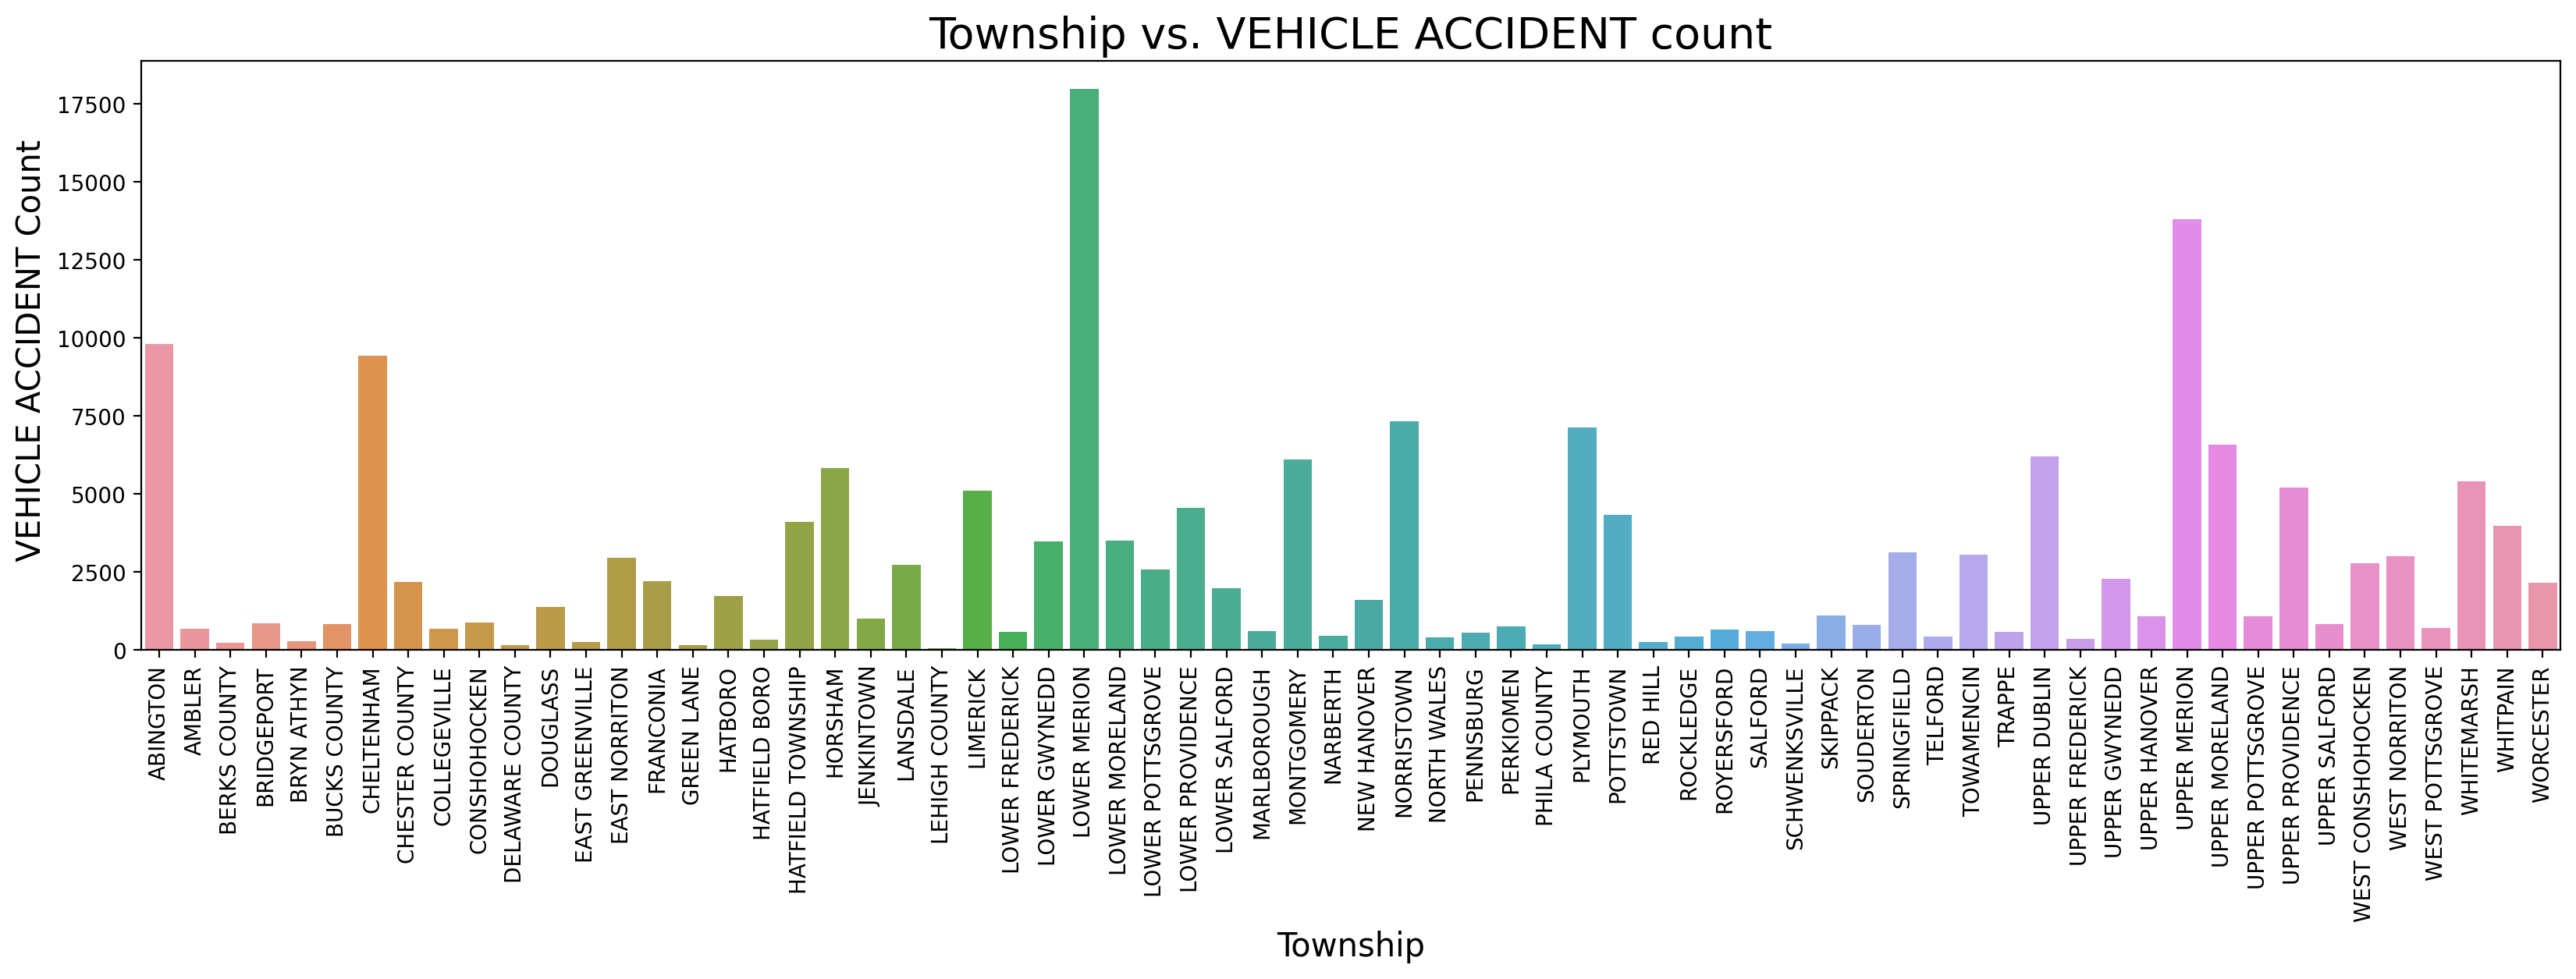

In [38]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=df[df['sub_reasons']==' VEHICLE ACCIDENT'].sort_values(by='twp'))
plt.title('Township vs. VEHICLE ACCIDENT count',fontsize=20)
plt.ylabel(' VEHICLE ACCIDENT Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

<li><h5><b>Lower Merion and Upper Merion</b> has most Traffic emergencies</h5></li>
<li><h5><b>Vehicle accidents</b> is the sub reason due to which most of the Traffic emergency occurs</h5></li>
<li><h5><b>Lower Merion</b> are the township for the most Vehicle accidents occurs</h5></li>

<h3>Key Observation for the township</h3>

<li><h5><b>Lower Merion and Abington</b> has most emergencies occurs.</h5></li>
<li><h5>These cities needs better medical service and traffic control systems</h5></li>
<li><h5>One way is to encourage the people to use public transport this will decrease the no of vehicles on road and thus lower the traffic emergency also reduce the pollution.</h5></li>
<li><h5>Provide the guidelines for the maintain good health and regular health chekups.</h5></li>

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [39]:
def date(x):
    return x.date()
df['date'] = df['timeStamp'].apply(date)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,sub_reasons,day,hour,month,day_of_week,day_night,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,10,17,12,Thu,Day hour,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,10,17,12,Thu,Day hour,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,10,14,12,Thu,Day hour,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,10,16,12,Thu,Day hour,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,10,16,12,Thu,Day hour,2015-12-10


<h3> 3 separate plots with each plot representing a Reason for the 911 calls grouping dates</h3>

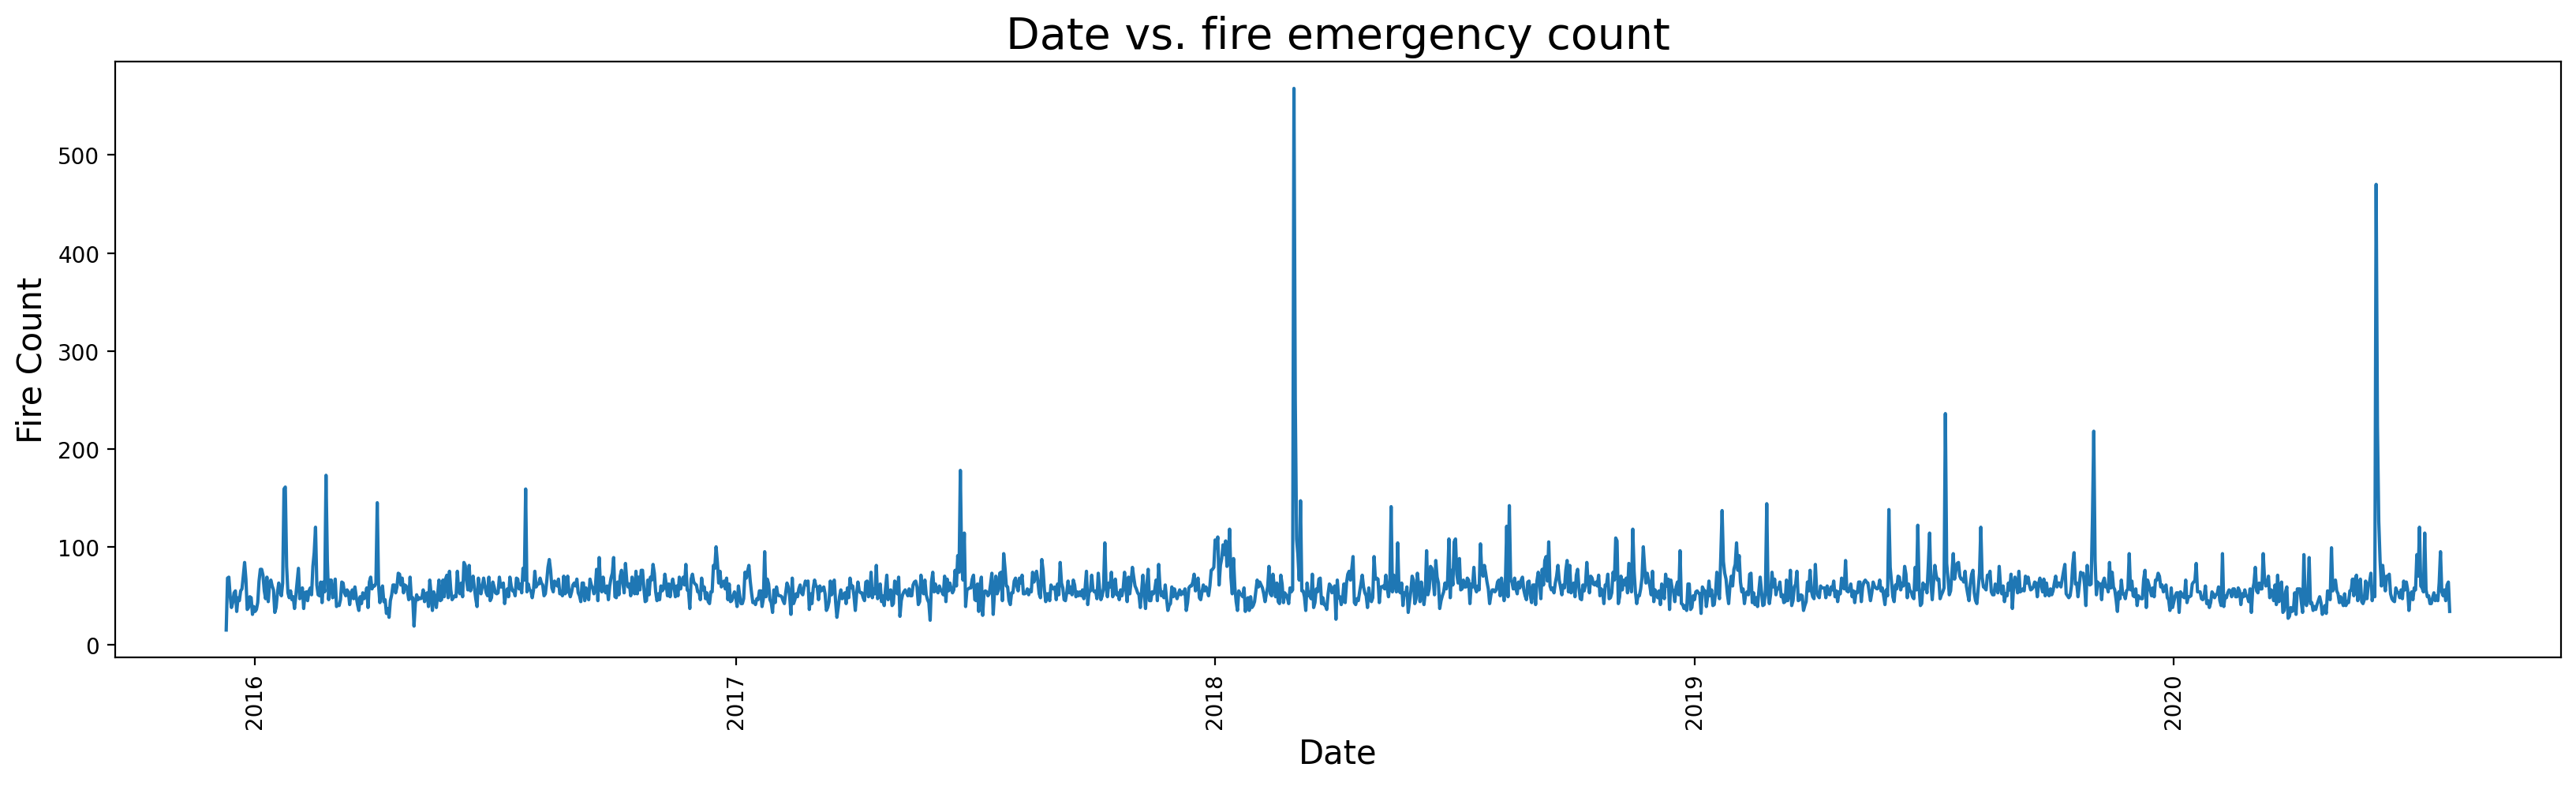

In [40]:
plt.figure(figsize=(20,5),dpi=200)
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Date vs. fire emergency count',fontsize=20)
plt.ylabel('Fire Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

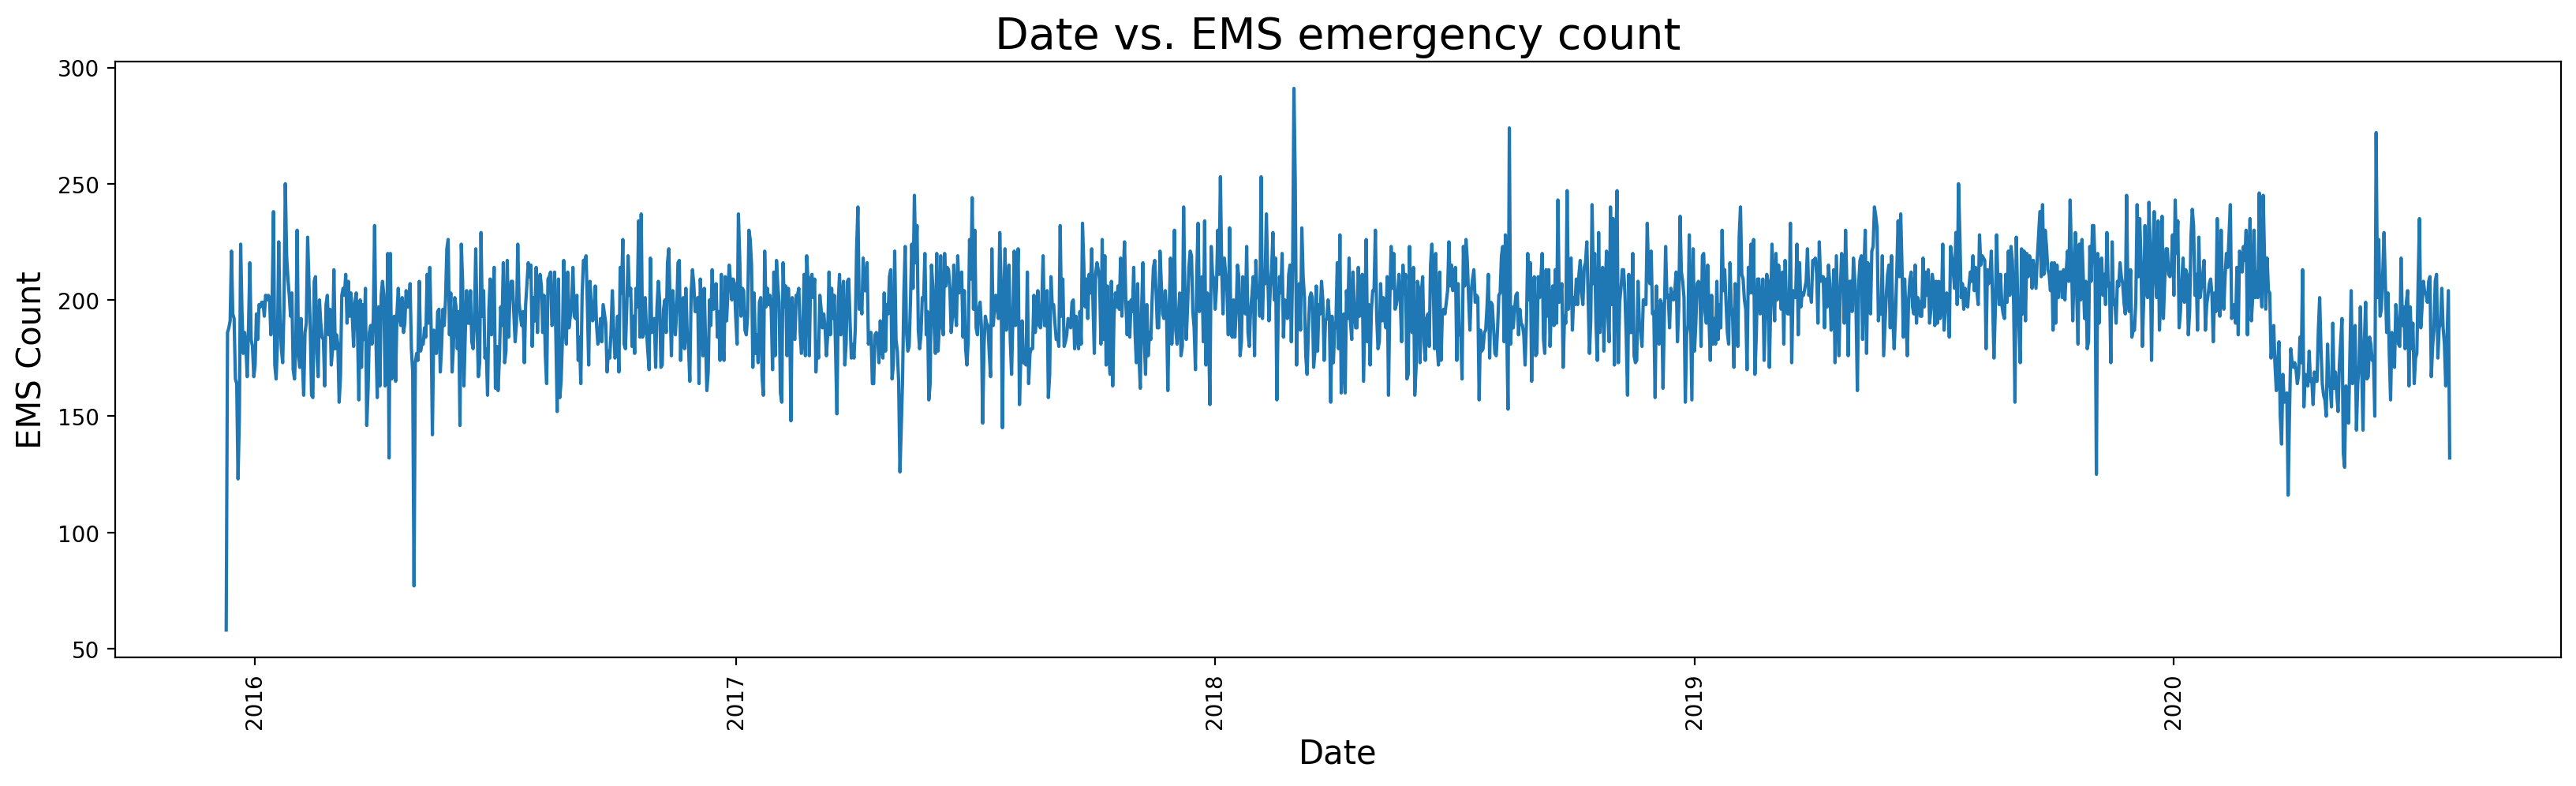

In [41]:
plt.figure(figsize=(20,5),dpi=200)
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('Date vs. EMS emergency count',fontsize=20)
plt.ylabel('EMS Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

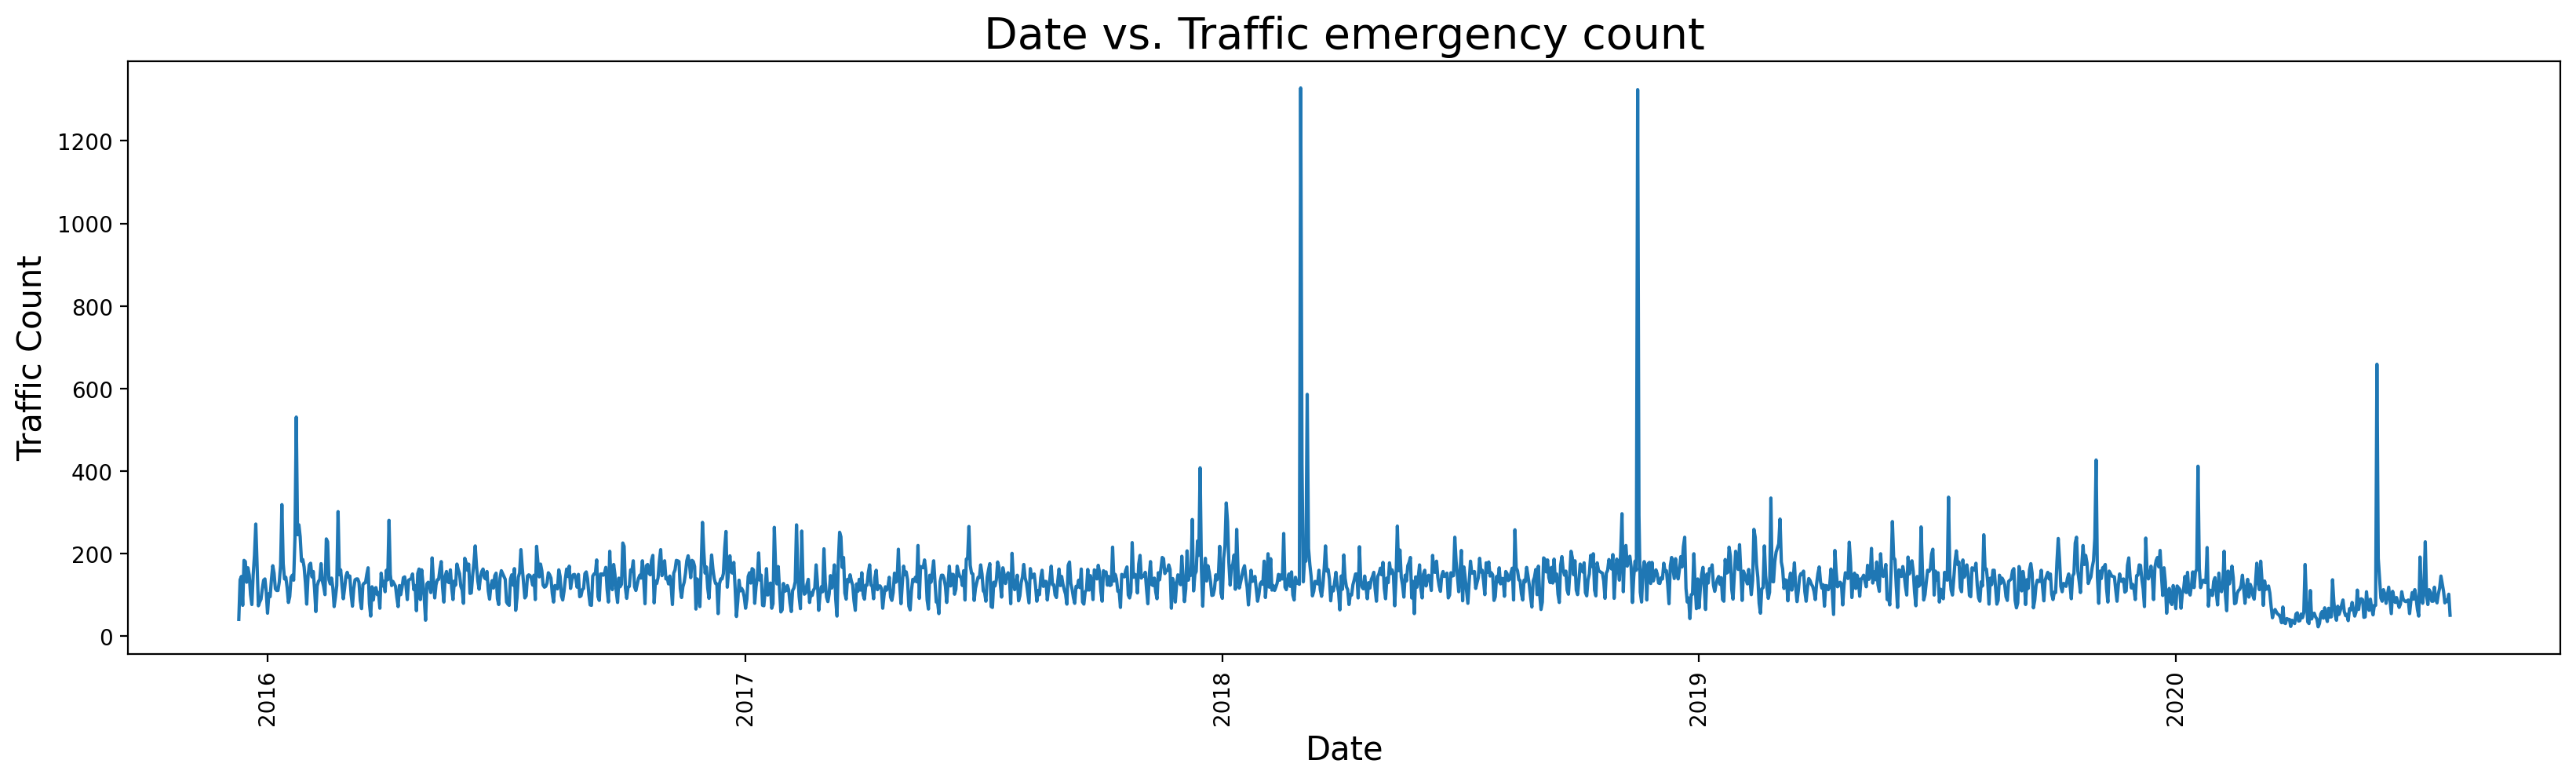

In [42]:
plt.figure(figsize=(20,5),dpi=200)
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Date vs. Traffic emergency count',fontsize=20)
plt.ylabel('Traffic Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

<li><h5><b>Fire and Traffic</b> is peak between the 2018 to 2019</h5></li>
<li><h5><b>EMS</b> emergency is quiet same from 2016</h5></li>

<h3>Lets see the emergency count on specific day in specific time frame</h3>

In [43]:
data1 = df.groupby(by=['day_of_week','hour']).count()['reason'].unstack()
data1

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,1981,1632,1449,1296,1338,1638,2663,4138,5017,5288,...,6392,7038,7064,7112,5667,5055,4373,3912,3421,2828
Mon,1893,1567,1366,1271,1336,1843,2675,4428,5502,5722,...,5713,6289,6341,6407,5440,4488,3823,3252,2654,2069
Sat,2442,2058,1879,1588,1449,1579,1879,2488,3457,4312,...,5420,5181,5210,5211,4979,4748,4125,3893,3224,2961
Sun,2423,2132,1938,1614,1468,1487,1725,2404,3001,3728,...,4744,4475,4559,4505,4402,4133,3747,3158,2627,2321
Thu,1731,1407,1424,1234,1292,1774,2814,4431,5296,5411,...,6078,6493,6374,6933,5510,4701,4043,3490,2844,2351
Tue,1719,1455,1322,1212,1245,1741,2782,4425,5633,5562,...,5923,6251,6494,6877,5625,4618,3843,3408,2706,2133
Wed,1662,1481,1258,1262,1128,1609,2667,4643,5465,5443,...,6068,6532,6743,7061,5690,4684,4113,3530,2825,2204


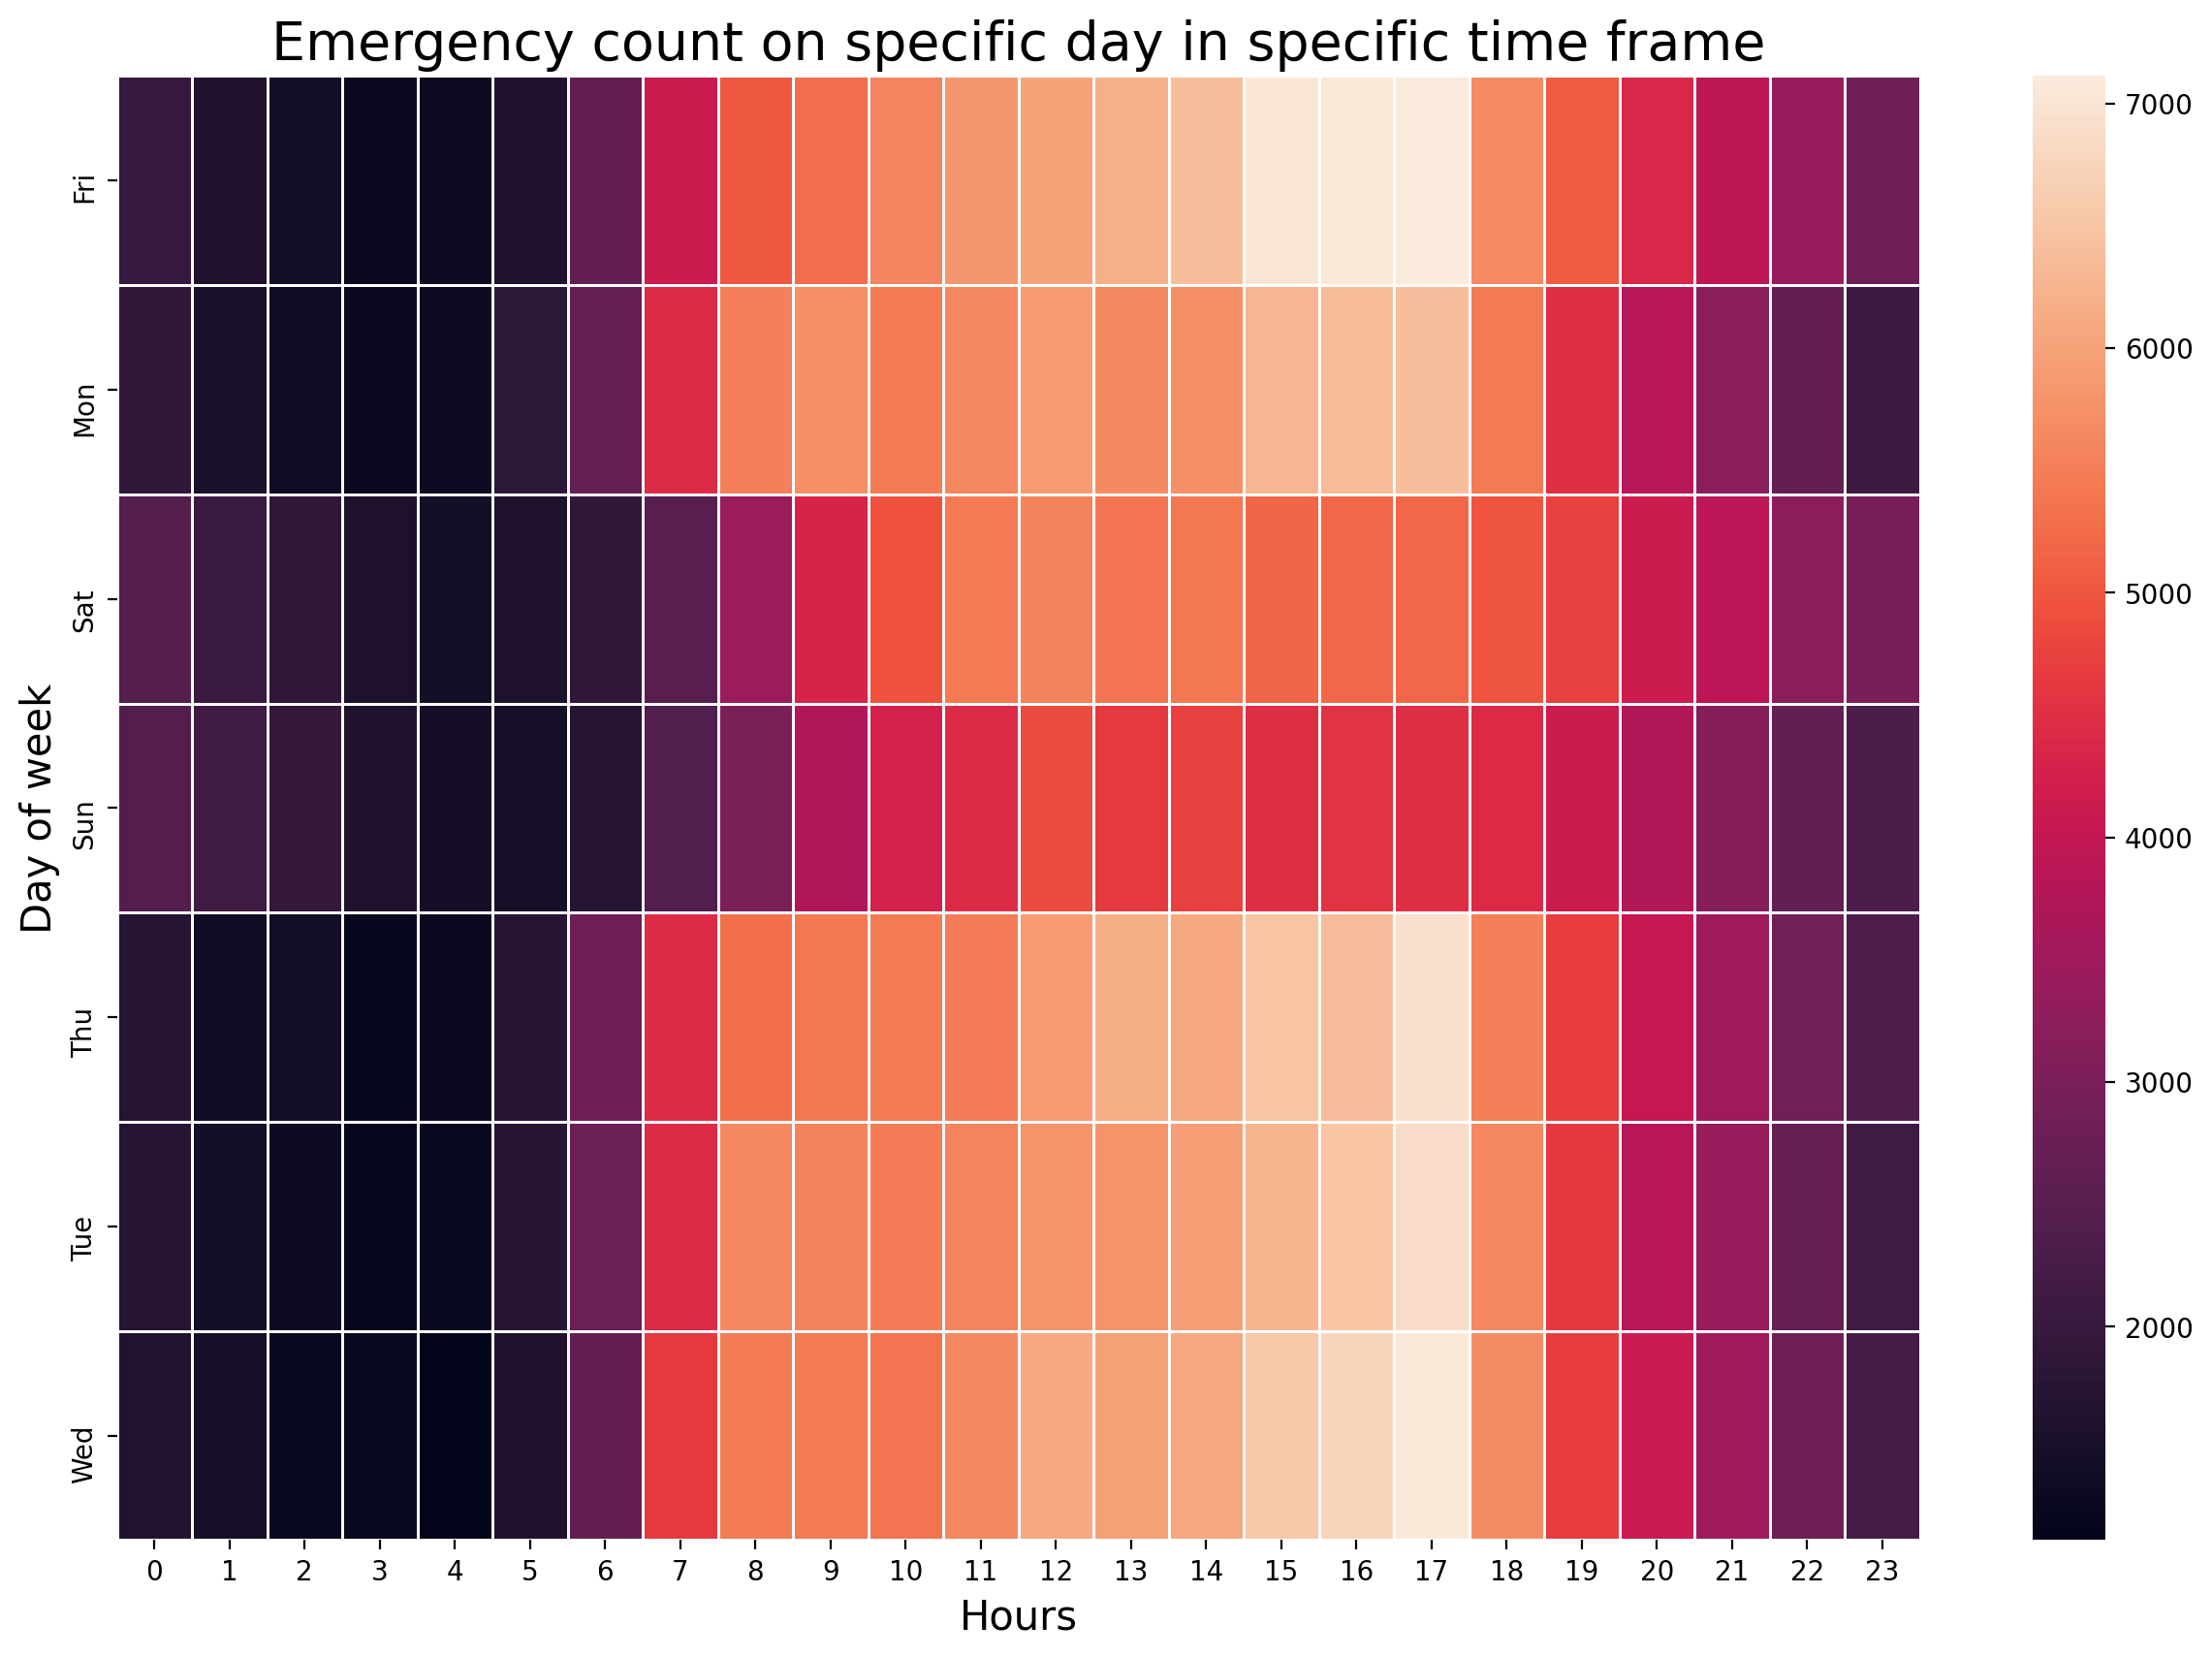

In [44]:
plt.figure(figsize=(15,10),dpi=200)
sns.heatmap(data1,linewidths=1)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Day of week',fontsize=15)
plt.title('Emergency count on specific day in specific time frame',fontsize=20);

<h4><b>It is clerly seen that most of the emergency occurs during day hours for each day of the week except on weekend it is less than any other day</b></h4>